
<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Travel Package Purchase Prediction</center></h1>
<h4><center>Author: Enrique Martin Sanchez</center></h4>

# Description

## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

### Customer details:

CustomerID: Unique customer ID

ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)

Age: Age of customer

TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.

Occupation: Occupation of customer

Gender: Gender of customer

NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer

PreferredPropertyStar: Preferred hotel property rating by customer

MaritalStatus: Marital status of customer

NumberOfTrips: Average number of trips in a year by customer

Passport: The customer has a passport or not (0: No, 1: Yes)

OwnCar: Whether the customers own a car or not (0: No, 1: Yes)

NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer

Designation: Designation of the customer in the current organization

MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfaction score

ProductPitched: Product pitched by the salesperson

NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch

DurationOfPitch: Duration of the pitch by a salesperson to the customer


# Import Libraries and load data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor

%matplotlib inline
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format



In [3]:
data = pd.read_excel('Tourism.xlsx', sheet_name=1)
df = data.copy()

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Single,1.00,1,2,1,0.00,Manager,"20,993.00"
1,200001,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,"20,130.00"
2,200002,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Single,7.00,1,3,0,0.00,Executive,"17,090.00"
3,200003,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,"17,909.00"
4,200004,0,NaN,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,"18,468.00"


**Insights**
- Data was loaded succesfully

# Support functions

In [5]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [6]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    sns.despine(top=True,right=True,left=True) 

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = "{:,.0f}".format(
                p.get_height()
              )  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [7]:
def labeled_2dim_barplot(data, feature_x, feature_y, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature_x: dataframe column
    feature_y: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature_x])  # length of the column
    count = data[feature_x].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.barplot(
        data=data,
        x=feature_x,
        y=feature_y,
        palette="Spectral",
        order=data[feature_x].value_counts().index[:n].sort_values(),
        ci=False
    )
    sns.despine(top=True,right=True,left=True)

    for p in ax.patches:
        label = "{:,.0f}".format(p.get_height())  

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [8]:
# function to plot an scatterplot and a lineplot at the same time

def scatter_lineplot(data, feature_x, feature_y, figsize=(12, 7)):
  """
  Boxplot and scatter and lineplot combined

  data: dataframe
  feature_x: dataframe column in x axis
  feature_y: dataframe column in y axis
  figsize: size of figure (default (12,7))
  """
  
  f2, (ax_scatter, ax_line) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.5, 0.5)},
        figsize=figsize,
  ) # creating the 2 subplots
  sns.scatterplot(
      data=data, x=feature_x, y=feature_y, ax=ax_scatter, color="orange"
  ).set_title(feature_x + ' vs ' + feature_y)
  sns.lineplot(
      data=data,  x=feature_x, y=feature_y, ax=ax_line, color="blue", ci=None
  ) 

In [9]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [10]:
#######################################################################################
#                                                                                     #
# groupby_feature function                                                            #
#                                                                                     #
# will calculate the mean, standard error and confidence interval 95%                 #
#                                                                                     #
#                                                                                     #
#######################################################################################
def groupby_feature(data='', groupby='', feature=''):
  stats = data.groupby([groupby])[feature].agg(['mean', 'sem']) #we get the mean and the standard error
  stats['ci95_hi'] = stats['mean'] + 1.96* stats['sem'] #calculate the higher point of the 95% confidence interval
  stats['ci95_lo'] = stats['mean'] - 1.96* stats['sem'] #calculate the lower point of the 95% confidence interval
  stats.index.name = groupby + ' / ' + feature
  print(stats, '\n')

In [11]:
#######################################################################################
#                                                                                     #
# multi_variate_plot function                                                         #
#                                                                                     #
# will plot a barplot and a stripplot of the receiving features (hue)                 #
# and print sone statistics of the variables                                          #
#                                                                                     #
#######################################################################################
def multi_variate_plot(data='', var1='', var2='', hue=[], figsize=(20,10)):
  #hue is a list with several hue valors
  plt.figure(figsize=figsize)
  position = 1 #initialize position variable 
  for i, hue_it in enumerate(hue): #for each hue we will make 2 plots
    plt.subplot(2,4, position) #create a barplot sublplot in a matrix of 2 rows and 4 columns in position = position
    position += 1
    sns.barplot(data=df, x=var1, y=var2, hue=hue_it, 
                estimator=np.mean).set_title(var1.upper()+'/'+var2.upper()+'/'+hue_it.upper());
    
    plt.subplot(2,4, position)#create a stripplot sublplot in a matrix of 2 rows and 4 columns in position = position
    position += 1
    sns.stripplot(data=df, x=var1, y=var2, hue=hue_it).set_title(var1.upper()+'/'+var2.upper()+'/'+hue_it.upper());
  #outside the for loop
  #print some statistics of the variables
  groupby_feature(data=data, groupby=var1, feature=var2)

In [12]:
# Create seaborn stripplot to plot 3 categorical variables
def stripplot_3(df='', x='', y='', hue='', dodge=True):
    ax = sns.stripplot(data=df, x=x, y=y, hue=hue, dodge=True)

    # Format figure size, spines and grid
    ax.figure.set_size_inches(7, 5)
    ax.grid(axis='y', color='black', alpha=0.2)
    ax.grid(axis='x', which='minor', color='black', alpha=0.2)
    sns.despine(left=True)

    # Edit labels and legend
    ax.set_xlabel(x, labelpad=15, size=12)
    ax.set_ylabel(y, labelpad=25, size=12)
    ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', frameon=False);

In [13]:
# function to treat outliers

def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th percentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [14]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, y_predict, title, labels=[1, 0]):
    
    cm = metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=labels,fmt='', cbar=False).set_title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, model_name, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining empty lists to store train and test results
    score_list_train=[] 
    score_list_test=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    #F1 of the model
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)
    
    score_list_train.extend((model_name, train_acc, train_recall, train_precision, train_f1))
    score_list_test.extend((model_name, test_acc, test_recall, test_precision, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. 
    # The default value is set to True.
    if flag == True: 
        print("----- Train scores -----")
        print("Accuracy on training set : ",model.score(X_train, y_train))
        print("Recall on training set : ",metrics.recall_score(y_train, pred_train))
        print("Precision on training set : ",metrics.precision_score(y_train, pred_train))
        print("F1 on training set : ", metrics.f1_score(y_train, pred_train))
        print("----- Test scores -----")
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on test set : ", metrics.f1_score(y_test, pred_test))
    
    return score_list_train, score_list_test # returning the lists with train and test scores

# Understanding the data

In [16]:
df.shape

(4888, 20)

**Insights**
Data has:
- 20 columns
- 4,888 rows

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Insights**
Data has:
- 7 float columns
- 7 int columns
- 6 object columns
- Some columns have some missing values

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,"4,888.00",NaN,NaN,NaN,"202,443.50","1,411.19","200,000.00","201,221.75","202,443.50","203,665.25","204,887.00"
ProdTaken,"4,888.00",NaN,NaN,NaN,0.19,0.39,0.00,0.00,0.00,0.00,1.00
Age,"4,662.00",NaN,NaN,NaN,37.62,9.32,18.00,31.00,36.00,44.00,61.00
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,"4,888.00",NaN,NaN,NaN,1.65,0.92,1.00,1.00,1.00,3.00,3.00
DurationOfPitch,"4,637.00",NaN,NaN,NaN,15.49,8.52,5.00,9.00,13.00,20.00,127.00
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,"4,888.00",NaN,NaN,NaN,2.91,0.72,1.00,2.00,3.00,3.00,5.00
NumberOfFollowups,"4,843.00",NaN,NaN,NaN,3.71,1.00,1.00,3.00,4.00,4.00,6.00


**Insights**
- CustomerID seems to be a unique identifier, will check it later
- ProdTaken is our target variable
- Age varies from 18 to 61 years with a mean of 37.62 years
- TypeofContact is a categorical variable with only 2 different values
- CityTier varies from 1 to 3 (possible categorical vsariable, will check it later)
- DurationOfPitch varies from 5 to 127 (we will say they are minutes) clearly there are some outliers and right skewness
- Occupation is a categorical variable with 4 different values
- Gender is a categorical variable with 3 different values
- NumberOfPersonVisiting varies from 1 to 5, possible categorical variable
- NumberOfFollowups varies from 1 to 6, possible categorical variable
- ProductPitched is a categorical variable with 5 different values
- PreferredPropertyStar varies from 3 to 5, possible categorical variable
- MaritalStatus is a categorical variable with 4 different values
- NumberOfTrips varies from 1 to 22, right skewness
- Passport values are 1 and 0, is a categorical variable
- PitchSatisfactionScore varies from 1 to 5, possible categorical variable
- OwnCar values (0,1) categorical variable
- NumberOfChildrenVisiting varies from 0 to 3, possible categorical variable
- Designation is a categorical variable with 5 different values
- MonthlyIncome varies from 1,000 to 98,678 (lets say USD, not that it matters)

In [19]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Insights**
- We have a lot of missing values in different columns, we will look into it later on

# Exploratory Data Analysis & data preprocessing

## Univariate analysis

### CustomerID

In [20]:
df.CustomerID.nunique()

4888

In [21]:
df.drop('CustomerID', axis=1, inplace=True)

**Insights**
- CustiomerID is a unique identifier
- We droped it from the dataset

### ProdTaken

In [22]:
df.ProdTaken.unique()

array([1, 0])

In [23]:
df.ProdTaken.isnull().sum()

0

**Insights**
- ProdTaken is our target variable
- It only has 0 and 1 as possible values
- There are non missing values

### Age

In [24]:
df.Age.describe()

count   4,662.00
mean       37.62
std         9.32
min        18.00
25%        31.00
50%        36.00
75%        44.00
max        61.00
Name: Age, dtype: float64

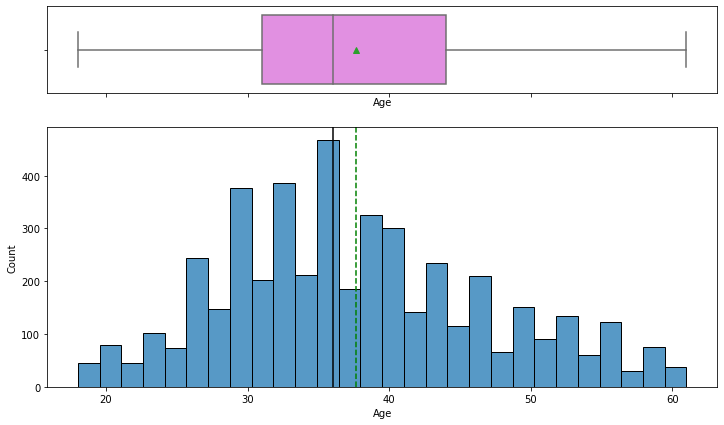

In [25]:
histogram_boxplot(data=df, feature='Age')

**Insights** 
- There are some missing values (will treat them later on)
- There are no outliers
- Distribution looks preaty normal with no skewness

### TypeofContact

In [26]:
df.TypeofContact.unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [27]:
df.TypeofContact.value_counts(dropna=False)

Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64

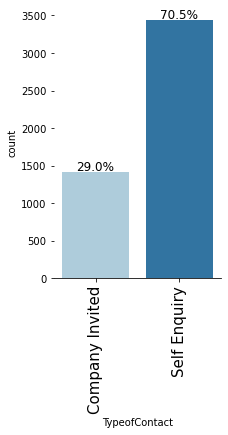

In [28]:
labeled_barplot(data=df, feature='TypeofContact', perc=True)

In [29]:
df.TypeofContact = df.TypeofContact.astype(dtype='category')

**Insights**
- More than 70% are Self Enquiry
- 29% Company Invited
- Less than 1% NaN values (will treat them later)
- Changed type to category

### CityTier

In [30]:
df.CityTier.value_counts(dropna=False)

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

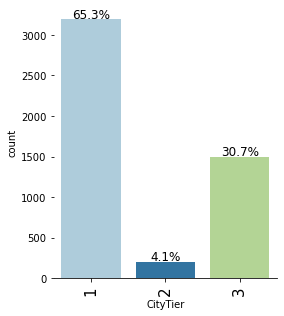

In [31]:
labeled_barplot(data=df, feature='CityTier', perc=True)

In [32]:
list_ordering = [1, 2, 3]
df.CityTier = pd.Categorical(df.CityTier, 
                      categories=list_ordering,
                      ordered=True)

**Insights**
- 65% Tier 1
- Only 4% Tier 2
- Almost 31% Tier 3
- There are non NaN values
- Converted it to an ordered categorical variable

### DurationOfPitch

In [33]:
df.DurationOfPitch.describe()

count   4,637.00
mean       15.49
std         8.52
min         5.00
25%         9.00
50%        13.00
75%        20.00
max       127.00
Name: DurationOfPitch, dtype: float64

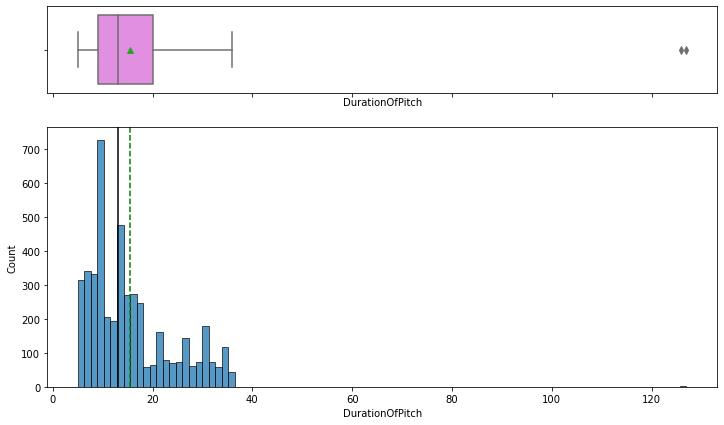

In [34]:
histogram_boxplot(data=df, feature='DurationOfPitch')

In [35]:
df = treat_outliers(df=df, col='DurationOfPitch')

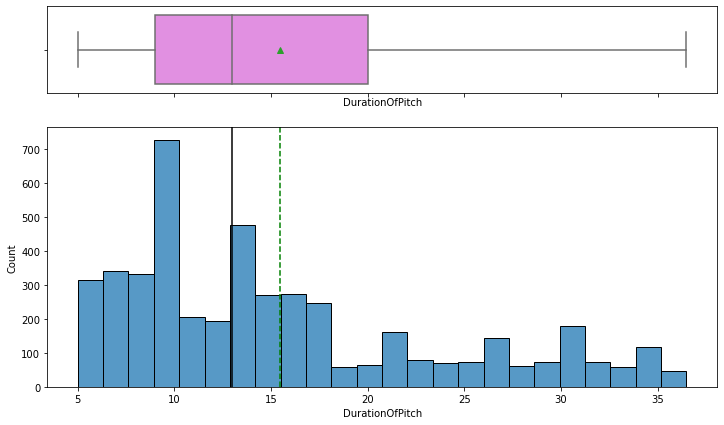

In [36]:
histogram_boxplot(data=df, feature='DurationOfPitch')

**Insights**
- We treated the outliers

### Occupation

In [37]:
df.Occupation.value_counts(dropna=False)

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

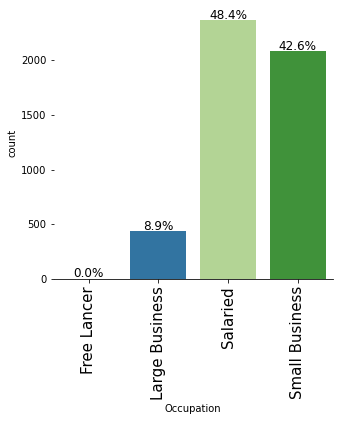

In [38]:
labeled_barplot(data=df, feature='Occupation', perc=True)

In [39]:
df.Occupation = df.Occupation.astype(dtype='category')

**Insights**
- 4 possible values
    - Free Lancer is almost non existant
    - Salaried is almost 50%
- Changed type to category

### Gender

In [40]:
df.Gender.value_counts(dropna=False)

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [41]:
#will change 'Fe male' to Female think it was a capture error
df.Gender = df.Gender.apply(lambda x: 'Female' if x == 'Fe Male' else x)
df.Gender.value_counts(dropna=False)

Male      2916
Female    1972
Name: Gender, dtype: int64

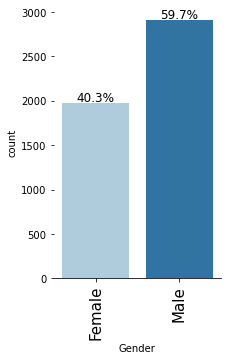

In [42]:
labeled_barplot(data=df, feature='Gender', perc=True)

In [43]:
df.Gender = df.Gender.astype(dtype='category')

**Insights**
- Changed 'Fe Male' to 'Female' considered as a capture error
- Changed type to category

### NumberOfPersonVisiting

In [44]:
df.NumberOfPersonVisiting.value_counts(dropna=False)

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

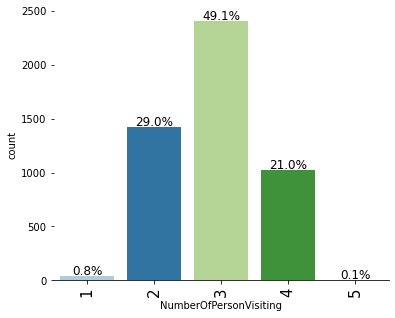

In [45]:
labeled_barplot(data=df, feature='NumberOfPersonVisiting', perc=True)

In [46]:
df.NumberOfPersonVisiting = df.NumberOfPersonVisiting.astype(dtype='category')

**Insights**
- 49% of cases has a value of 3 on this feature
- 1 and 5 are almost non existent
- Changed type to category

### NumberOfFollowups

In [47]:
df.NumberOfFollowups.value_counts(dropna=False)

4.00    2068
3.00    1466
5.00     768
2.00     229
1.00     176
6.00     136
NaN       45
Name: NumberOfFollowups, dtype: int64

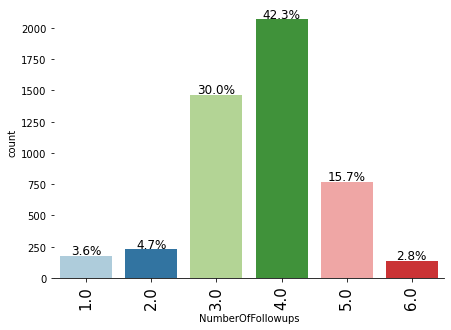

In [48]:
labeled_barplot(data=df, feature='NumberOfFollowups', perc=True)

In [49]:
df.NumberOfFollowups = df.NumberOfFollowups.astype(dtype='category')

**Insights**
- We have some NaN values, will treat them later
- 4 is the most frequent number of followups with more thaan 42%
- 6 is the least frequent number of followups with only a 2.8%
- Changed type to Category

### ProductPitched

In [50]:
df.ProductPitched.value_counts(dropna=False)

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

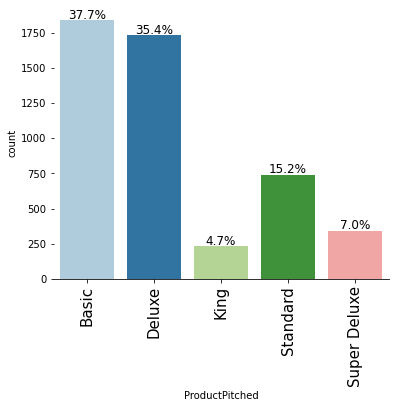

In [51]:
labeled_barplot(data=df, feature='ProductPitched', perc=True)

In [52]:
df.ProductPitched = df.ProductPitched.astype(dtype='category')

**Insights**
- There are non NaN values
- Basic and Deluxe are the most frequent values
- King is the leasst frequent with only a 4.7% of the cases
- Changed type to Category

### PreferredPropertyStar

In [53]:
df.PreferredPropertyStar.value_counts(dropna=False)

3.00    2993
5.00     956
4.00     913
NaN       26
Name: PreferredPropertyStar, dtype: int64

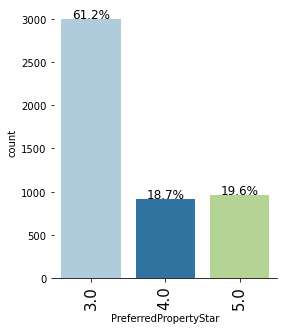

In [54]:
labeled_barplot(data=df, feature='PreferredPropertyStar', perc=True)

In [55]:
df.PreferredPropertyStar = df.PreferredPropertyStar.astype(dtype='category')

**Insights**
- There are some NaN values, will treat them later
- The most frequent value of Preferred Property Stars is 3 with 61% of cases
- 4 and 5 are close to each other with a little less than 20% each
- Changed type to categorical

### MaritalStatus

In [56]:
df.MaritalStatus.value_counts(dropna=False)

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

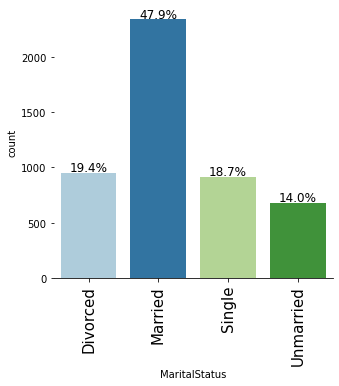

In [57]:
labeled_barplot(data=df, feature='MaritalStatus', perc=True)

In [58]:
df.MaritalStatus = df.MaritalStatus.astype(dtype='category')

**Insights**
- Married is the most frequent value with almost 48%
- Unmarried is the leasst frequent with 14%
- There are non NaN values

### NumberOfTrips

In [59]:
df.NumberOfTrips.value_counts(dropna=False)

2.00     1464
3.00     1079
1.00      620
4.00      478
5.00      458
6.00      322
7.00      218
NaN       140
8.00      105
19.00       1
21.00       1
20.00       1
22.00       1
Name: NumberOfTrips, dtype: int64

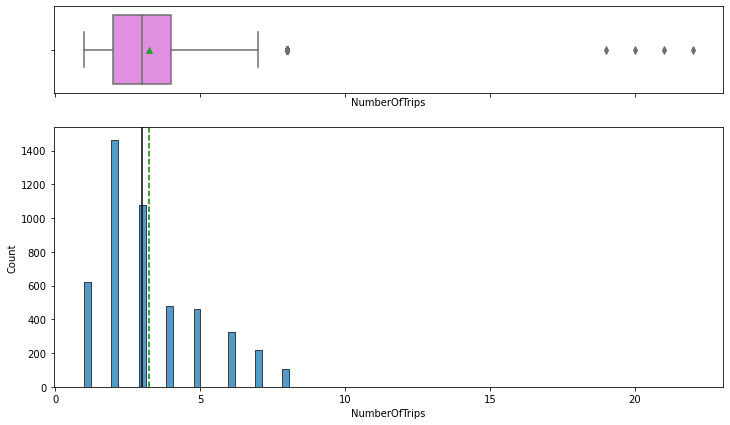

In [60]:
histogram_boxplot(data=df, feature='NumberOfTrips')

In [61]:
df = treat_outliers(df=df, col='NumberOfTrips')

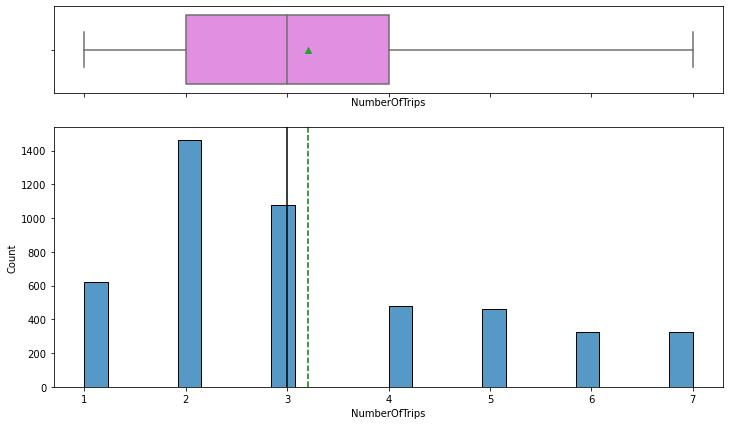

In [62]:
histogram_boxplot(data=df, feature='NumberOfTrips')

In [63]:
df.NumberOfTrips.value_counts(dropna=False)

2.00    1464
3.00    1079
1.00     620
4.00     478
5.00     458
7.00     327
6.00     322
NaN      140
Name: NumberOfTrips, dtype: int64

In [64]:
df.NumberOfTrips = df.NumberOfTrips.astype(dtype='category')

**Insights**
- Treated outliers
- There are some NaN values, will treat them later
- Changed type to categorical

## Passport

In [65]:
df.Passport.value_counts(dropna=False)

0    3466
1    1422
Name: Passport, dtype: int64

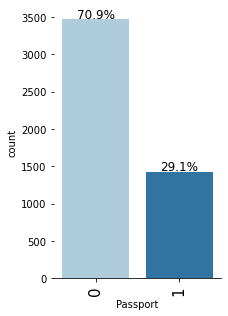

In [66]:
labeled_barplot(data=df, feature='Passport', perc=True)

In [67]:
df.Passport = df.Passport.astype(dtype='category')

**Insights**
- 71% does not have a passport
- 29% have a passport
- No NaN values
- Changed type to categorical

## PitchSatisfactionScore

In [68]:
df.PitchSatisfactionScore.value_counts(dropna=False)

3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64

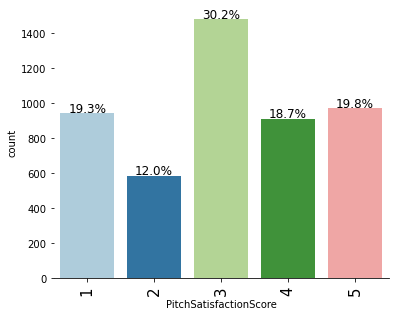

In [69]:
labeled_barplot(data=df, feature='PitchSatisfactionScore', perc=True)

In [70]:
df.PitchSatisfactionScore = df.PitchSatisfactionScore.astype(dtype='category')

**Insights**
- No NaN values
- 3 (30.2%) is the most frequent value
- 2 (12%) is the least frequent
- Changed type to categorical

## OwnCar

In [71]:
df.OwnCar.value_counts(dropna=False)

1    3032
0    1856
Name: OwnCar, dtype: int64

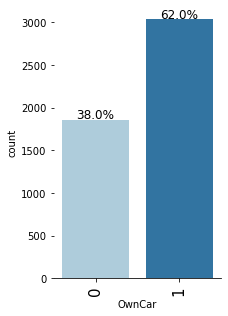

In [72]:
labeled_barplot(data=df, feature='OwnCar', perc=True)

In [73]:
df.OwnCar = df.OwnCar.astype(dtype='category')

**Insights**
- 62% own a car
- 38% does not own a car
- No NaN values
- Changed type to categorical

## NumberOfChildrenVisiting

In [74]:
df.NumberOfChildrenVisiting.value_counts(dropna=False)

1.00    2080
2.00    1335
0.00    1082
3.00     325
NaN       66
Name: NumberOfChildrenVisiting, dtype: int64

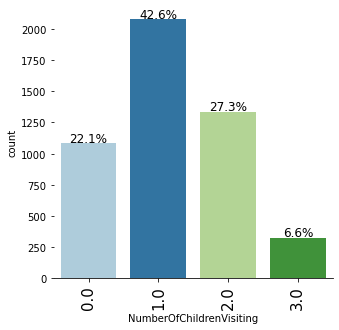

In [75]:
labeled_barplot(data=df, feature='NumberOfChildrenVisiting', perc=True)

In [76]:
df.NumberOfChildrenVisiting = df.NumberOfChildrenVisiting.astype(dtype='category')

**Insights**
- 1 is the most frequent value (42.6%)
- 3 is the least frequent (6.6%)
- Some NaN values will treat them later
- Changed type to categorical

## Designation

In [77]:
df.Designation.value_counts(dropna=False)

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

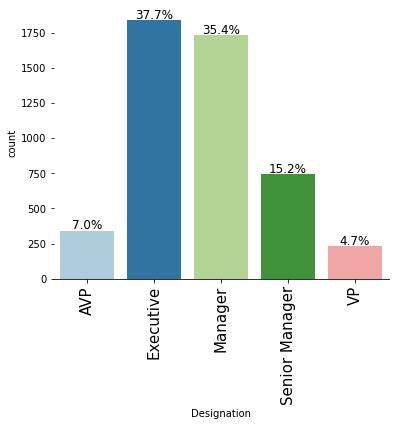

In [78]:
labeled_barplot(data=df, feature='Designation', perc=True)

In [79]:
df.Designation = df.Designation.astype(dtype='category')

**Insights**
- Execiutive and Manager are the most frequent values
- AVP and VP are the least frequent values
- No NaN values
- Changed type to categorical

## MonthlyIncome

In [80]:
df.MonthlyIncome.value_counts(dropna=False)

NaN          233
20,855.00      7
21,020.00      7
21,288.00      7
17,342.00      7
            ... 
17,074.00      1
24,250.00      1
21,077.00      1
24,714.00      1
21,471.00      1
Name: MonthlyIncome, Length: 2476, dtype: int64

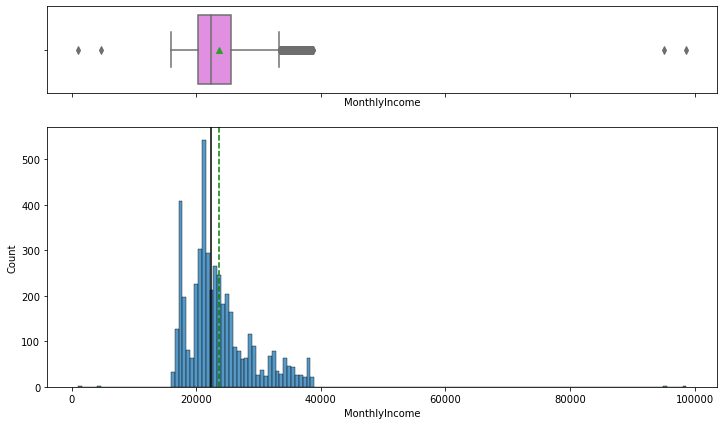

In [81]:
histogram_boxplot(data=df, feature='MonthlyIncome')

In [82]:
df = treat_outliers(df=df, col='MonthlyIncome')

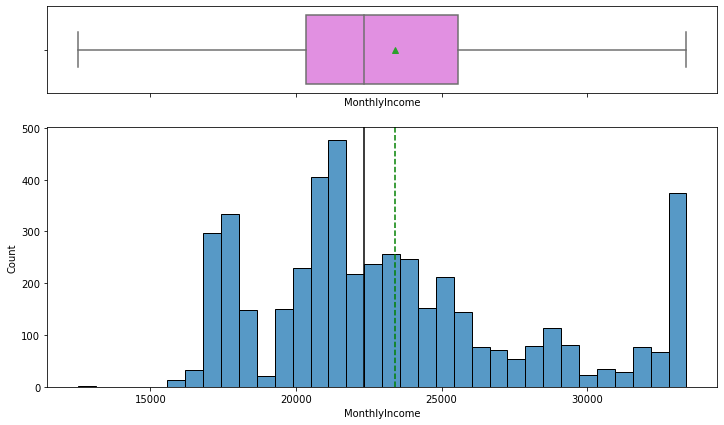

In [83]:
histogram_boxplot(data=df, feature='MonthlyIncome')

In [84]:
df.MonthlyIncome.describe()

count    4,655.00
mean    23,410.67
std      4,712.09
min     12,508.50
25%     20,346.00
50%     22,347.00
75%     25,571.00
max     33,408.50
Name: MonthlyIncome, dtype: float64

**Insights**
- There are some NaN values, will treat them later on
- Treated outliers on both sides
- Mean Income is 23,410 USD

## Missing value treatment

In [85]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### Age


In [86]:
df['Age'].fillna(np.round(df['Age'].mean()), inplace=True)

**Insights**
- We treated Age missing values rounding the mean value

### TypeofContact

In [87]:
df.TypeofContact.value_counts(normalize=True, dropna=False)

Self Enquiry      0.70
Company Invited   0.29
NaN               0.01
Name: TypeofContact, dtype: float64

In [88]:
df['TypeofContact'].fillna(df['TypeofContact'].mode().iloc[0], inplace=True)

In [89]:
df.TypeofContact.value_counts(normalize=True, dropna=False)

Self Enquiry      0.71
Company Invited   0.29
Name: TypeofContact, dtype: float64

**Insights** 
- We changed NaN values for the most common value (Self Enquiry)

### DurationOfPitch

In [90]:
df['DurationOfPitch'].fillna(np.round(df['DurationOfPitch'].mean()), inplace=True)

**Insights**
- We reated DuratioOfPitch missing values rounding the mean value

### NumberOfFollowups

In [91]:
df.NumberOfFollowups.value_counts(normalize=True, dropna=False)

4.0   0.42
3.0   0.30
5.0   0.16
2.0   0.05
1.0   0.04
6.0   0.03
NaN   0.01
Name: NumberOfFollowups, dtype: float64

In [92]:
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode().iloc[0], inplace=True)

In [93]:
df.NumberOfFollowups.value_counts(normalize=True, dropna=False)

4.0   0.43
3.0   0.30
5.0   0.16
2.0   0.05
1.0   0.04
6.0   0.03
Name: NumberOfFollowups, dtype: float64

**Insights**
- Changed the NaN values with the most frequent value (4)
- NaN values were only 1%

### PreferredPropertyStar

In [94]:
df.PreferredPropertyStar.value_counts(normalize=True, dropna=False)

3.0   0.61
5.0   0.20
4.0   0.19
NaN   0.01
Name: PreferredPropertyStar, dtype: float64

In [95]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode().iloc[0], inplace=True)

In [96]:
df.PreferredPropertyStar.value_counts(normalize=True, dropna=False)

3.0   0.62
5.0   0.20
4.0   0.19
Name: PreferredPropertyStar, dtype: float64

**Insights**
- Changed the NaN values with the most frequent value (3)
- NaN values were only 1%

### NumberOfTrips

In [97]:
df.NumberOfTrips.value_counts(normalize=True, dropna=False)

2.0   0.30
3.0   0.22
1.0   0.13
4.0   0.10
5.0   0.09
7.0   0.07
6.0   0.07
NaN   0.03
Name: NumberOfTrips, dtype: float64

In [98]:
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode().iloc[0], inplace=True)

In [99]:
df.NumberOfTrips.value_counts(normalize=True, dropna=False)

2.0   0.33
3.0   0.22
1.0   0.13
4.0   0.10
5.0   0.09
7.0   0.07
6.0   0.07
Name: NumberOfTrips, dtype: float64

**Insights**
- 3% of NaN values
- Changed them to the most frequent value (2)

### NumberOfChildrenVisiting

In [100]:
df.NumberOfChildrenVisiting.value_counts(normalize=True, dropna=False)

1.0   0.43
2.0   0.27
0.0   0.22
3.0   0.07
NaN   0.01
Name: NumberOfChildrenVisiting, dtype: float64

In [101]:
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode().iloc[0], inplace=True)

In [102]:
df.NumberOfChildrenVisiting.value_counts(normalize=True, dropna=False)

1.0   0.44
2.0   0.27
0.0   0.22
3.0   0.07
Name: NumberOfChildrenVisiting, dtype: float64

**Insights**
- Changed the NaN values with the most frequent value (1)
- NaN values were only 1%

### MonthlyIncome

In [103]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

**Insights**
- Nan values treated with mean 

### Final NaN values review

In [104]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**Insights**
- There are non NaN values

## Bivariate analysis

### Correlation

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4888 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   category
 13  Passport                  4888 non-null   catego

In [106]:
cat_cols = df.dtypes[df.dtypes == 'category'].index
num_cols = df.dtypes[df.dtypes == 'float'].index

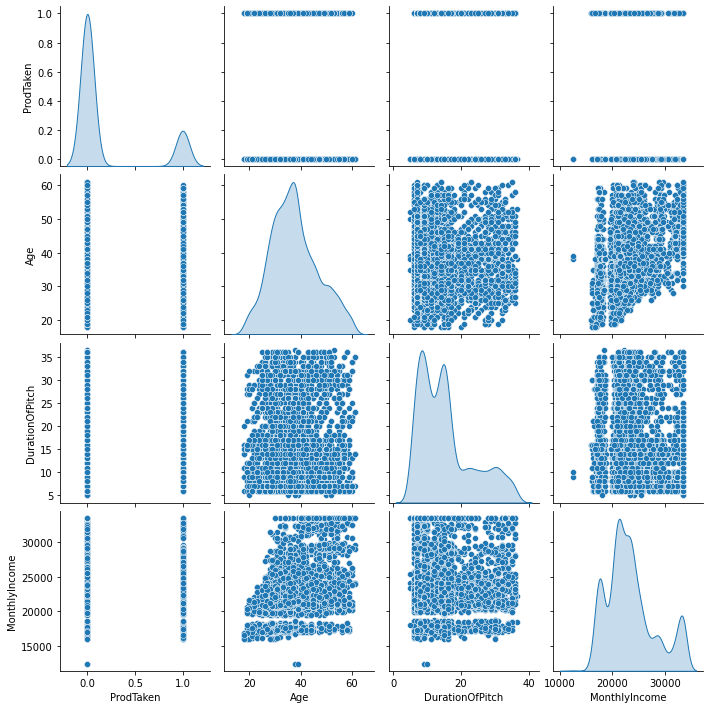

In [107]:
sns.pairplot(data=df, diag_kind='kde')

**Insights**
- It seems that there is non great correlation between our Target feature and any other numerical variable

<AxesSubplot:>

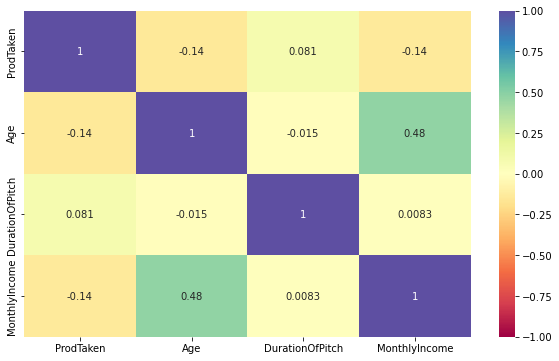

In [108]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

**Insights**
- Target variable is not correlated to any other variable
- Age and Income are slightly correlated

### Target variable vs other features

#### Target vs numerical features

In [109]:
num_cols

Index(['Age', 'DurationOfPitch', 'MonthlyIncome'], dtype='object')

##### vs Age

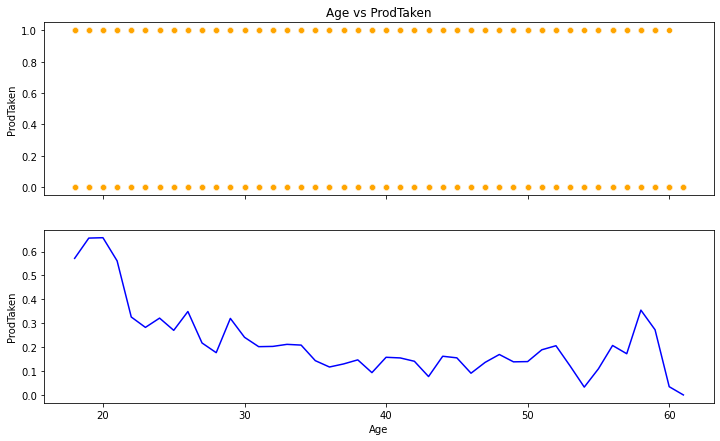

In [110]:
scatter_lineplot(data=df, feature_y='ProdTaken', feature_x='Age')

**Insights**
- There is no correlation between the 2 variables

##### vs DurationOfPitch

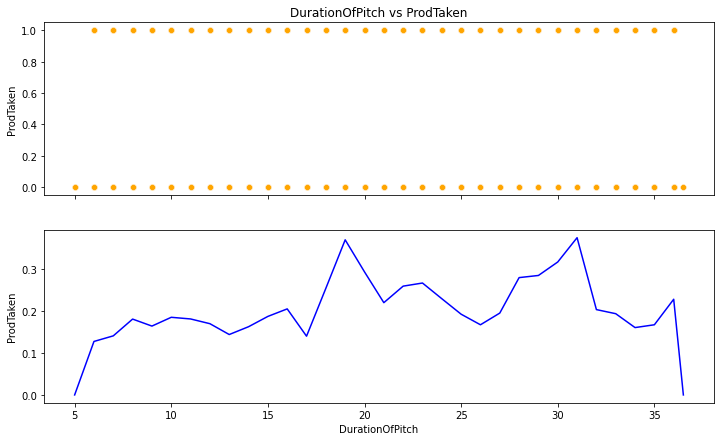

In [111]:
scatter_lineplot(data=df, feature_y='ProdTaken', feature_x='DurationOfPitch')

**Insights**
- There is no correlation between the 2 variables

##### vs MonthlyIncome

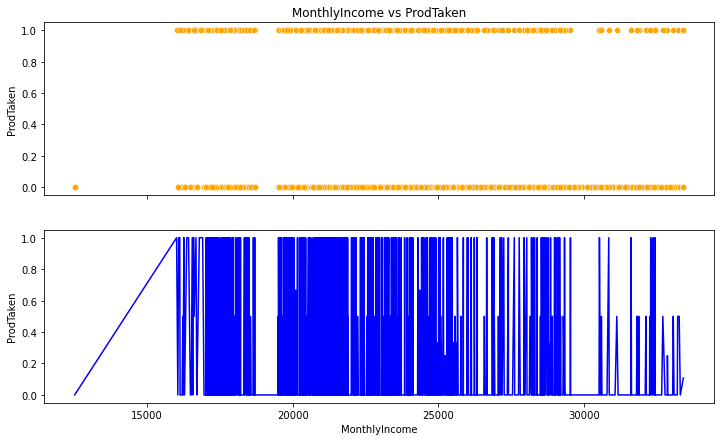

In [112]:
scatter_lineplot(data=df, feature_y='ProdTaken', feature_x='MonthlyIncome')

**Insights**
- There is no correlation between the 2 variables

#### Target vs categorical features

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


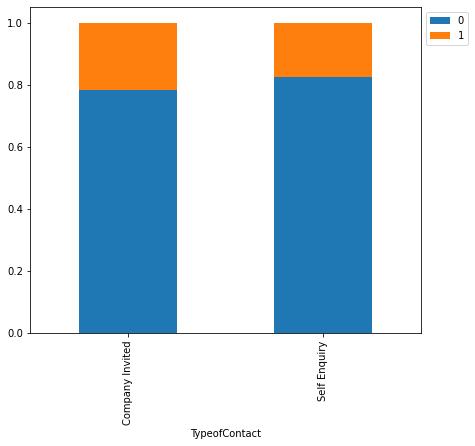

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


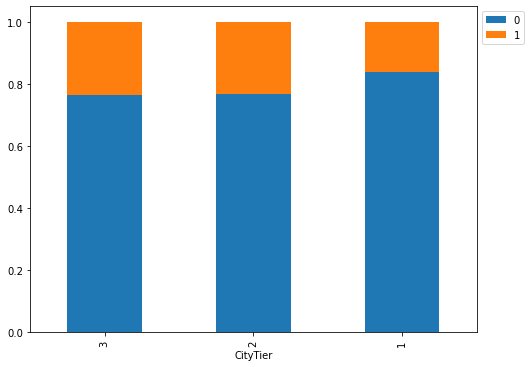

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


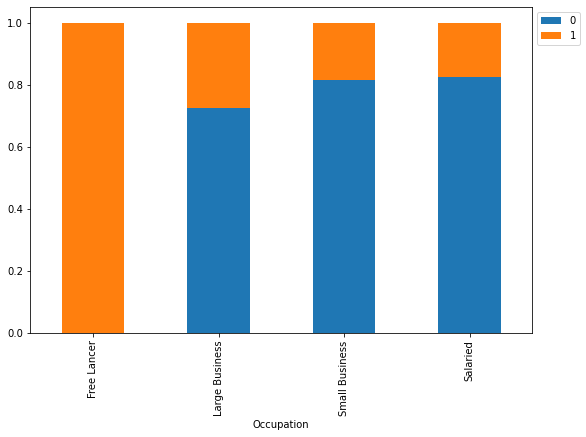

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


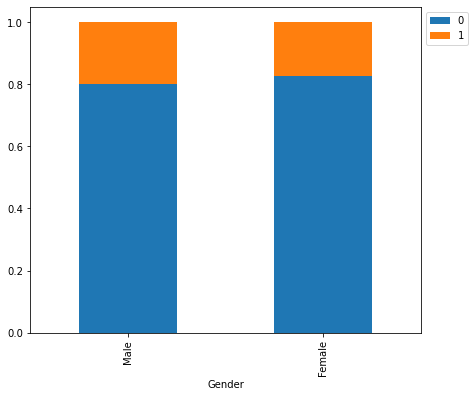

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


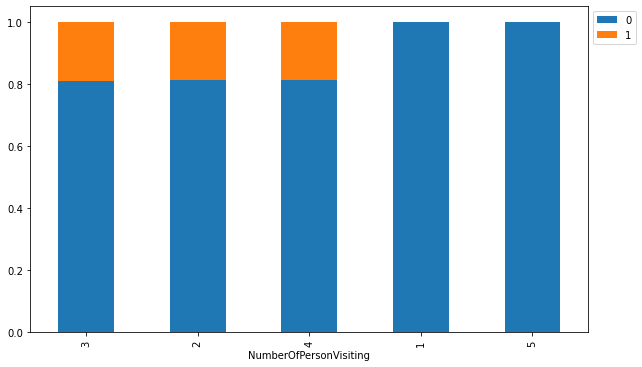

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4.0                1726  387  2113
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


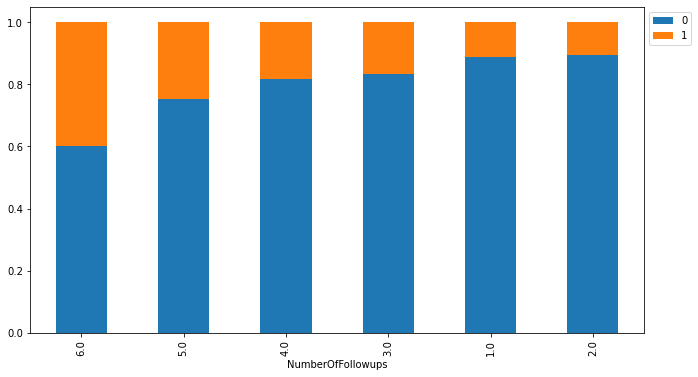

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


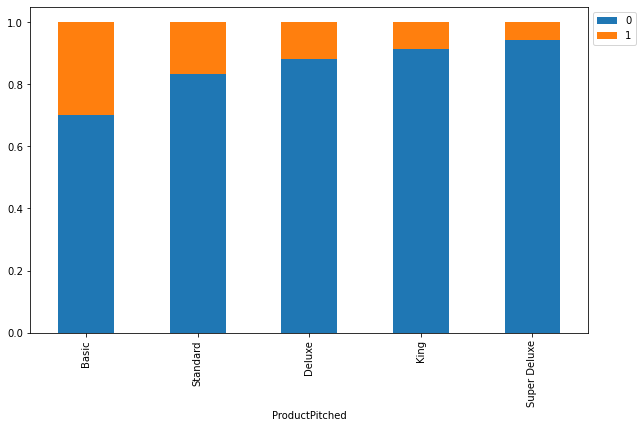

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


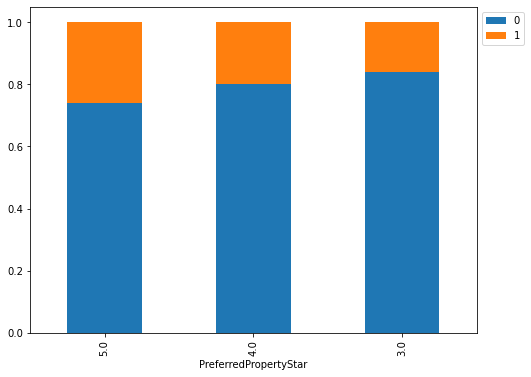

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


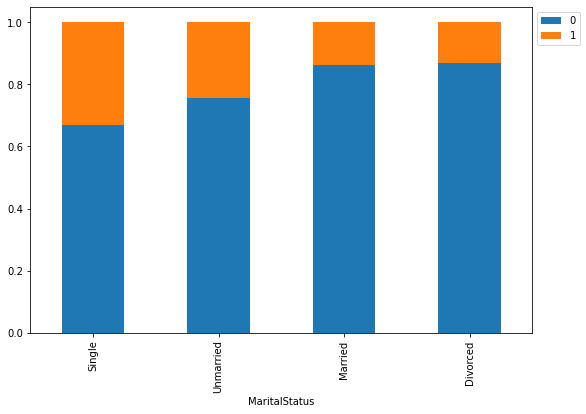

ProdTaken         0    1   All
NumberOfTrips                 
All            3968  920  4888
2.0            1293  311  1604
3.0             862  217  1079
1.0             508  112   620
7.0             234   93   327
6.0             258   64   322
5.0             396   62   458
4.0             417   61   478
------------------------------------------------------------------------------------------------------------------------


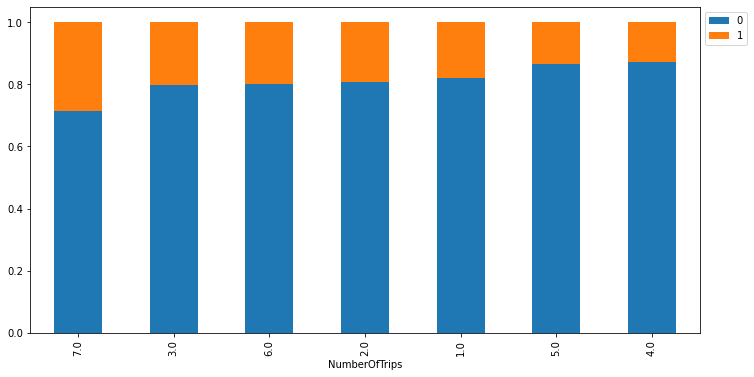

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


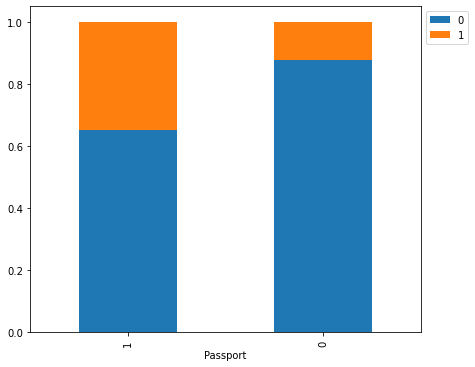

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


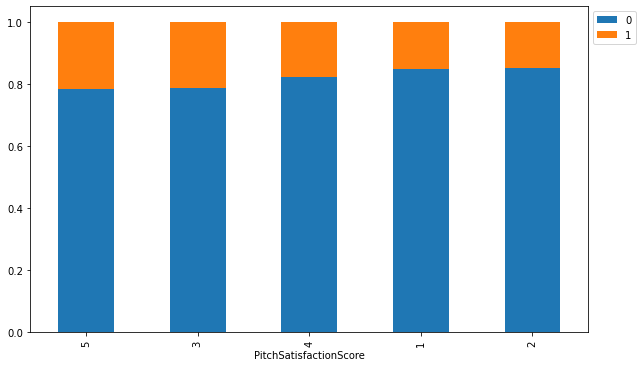

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


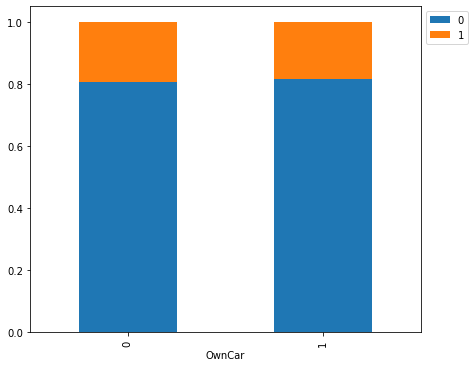

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1.0                       1747  399  2146
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


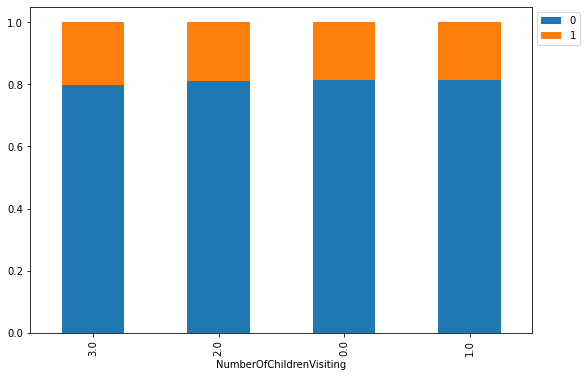

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


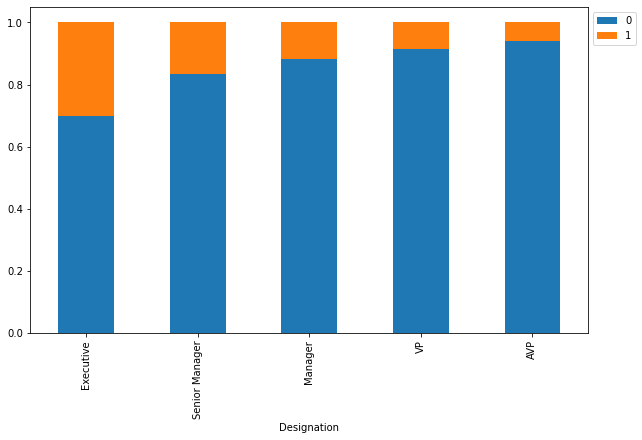

In [113]:
for i, variable in enumerate(cat_cols):
    stacked_barplot(df, variable,'ProdTaken')

**Insights**
- TypeofContact makes no big difference between Company Invited and Self Enquiry vs ProdTaken
- City Tier 1 has a slightly more 0s than 1s
- All freelancers have taken the product (they are only 2 tho) and large business is the one with the bigest proportion of 1s
- Gender does not have a big difference
- Neither 1 and 5 persons visiting are taking the product
- As the number of followups increases so does the products taken (which makes perfect sense)
- Basic and standar product pitches are the most efficient
- 5 stars have the biggest proportion of 1s
- Single and unmarried have bigger proportions of 1s
- 7 number of trips have a bigger proportion of 1s
- People who owns a passport have a significant better chance to take the product
- Pitch satisfaction score of 5 has the biggest chances of 1s
- Owning a car does not make a difference
- Number of children visiting does not have a difference
- Executives have a much better chance to take the product followed by senior managers

## Multivariate analysis

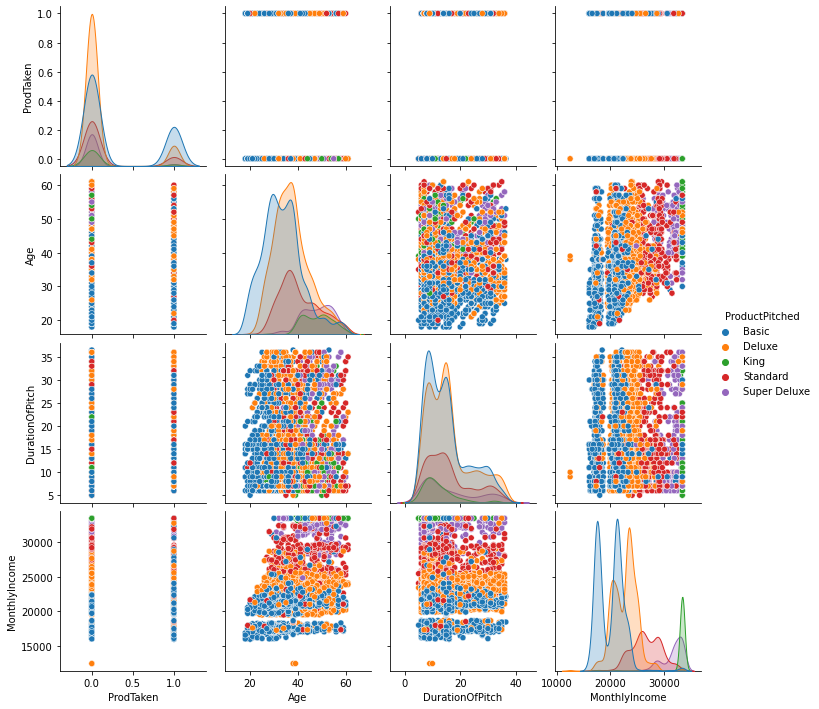

In [114]:
sns.pairplot(data=df, diag_kind='kde', hue='ProductPitched')

**Insights**
- Age and MonthlyIncome seems to be differentiated by the ProductPitched, lets explore them further

                      mean  sem  ci95_hi  ci95_lo
ProductPitched / Age                             
Basic                33.44 0.20    33.82    33.06
Deluxe               37.41 0.18    37.77    37.05
King                 48.07 0.40    48.86    47.27
Standard             40.58 0.31    41.18    39.98
Super Deluxe         48.03 0.34    48.70    47.36 



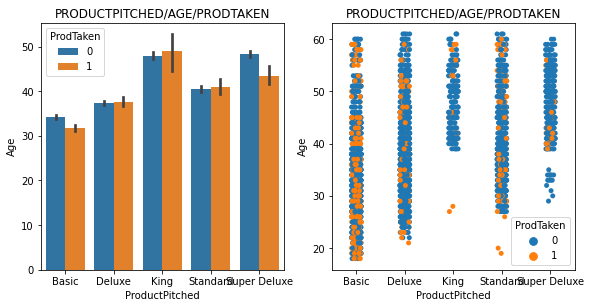

In [115]:
multi_variate_plot(data=df, var1='ProductPitched', var2='Age', hue=['ProdTaken'])

**Insights**
- Basic and deluxe products have more chances of getting 0s than 1s
- The age of people who buys a Basic product seems to be non important (people of all ages seems to have the same chances of getting it)
- People of mid 30s and early 50s buy Delux product
- King product who has taken the product are from late 20s and mid to late 50s
- Standard product is taken by people of all ages
- Super Deluxe product is preferred by people of early 40s

                                    mean    sem   ci95_hi   ci95_lo
ProductPitched / MonthlyIncome                                     
Basic                          20,023.65  58.65 20,138.60 19,908.70
Deluxe                         22,709.51  55.07 22,817.44 22,601.58
King                           33,274.39  86.96 33,444.83 33,103.96
Standard                       26,624.50 101.15 26,822.76 26,426.25
Super Deluxe                   31,597.72 117.51 31,828.04 31,367.40 



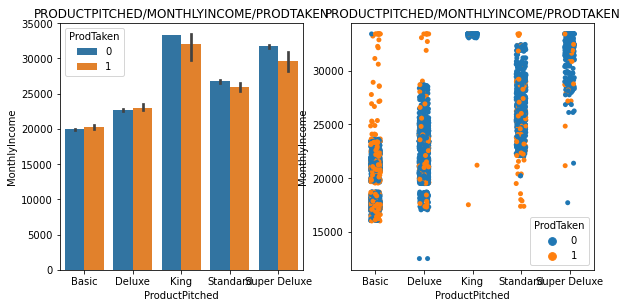

In [116]:
multi_variate_plot(data=df, var1='ProductPitched', var2='MonthlyIncome', hue=['ProdTaken'])

**Insights**
- All Basic product pitches to clients with Income bigger than 24k took the product
- All Delux product pitches to clients with Income bigger than 29k took the product
- All King product pitches to clients with Income lower than 22k took the product
- Standar product started to get rejected by clients with Income bigger than 22k
- Super Delux product does not get affected in a particuar way by Income

## Profile information by package taken

In [117]:
df.ProdTaken.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [118]:
df_taken = df[df.ProdTaken == 1]

In [119]:
df_taken.shape

(920, 19)

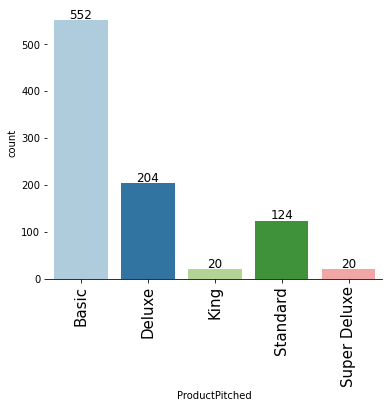

In [120]:
labeled_barplot(data=df_taken, feature='ProductPitched') 

**Insights**
- Basic Product is the most offered, followed by Deluxe and Standard
- King product is the least offered followed by Super Deluxe

In [121]:
# Lets see relations with numerical columns
num_cols

Index(['Age', 'DurationOfPitch', 'MonthlyIncome'], dtype='object')

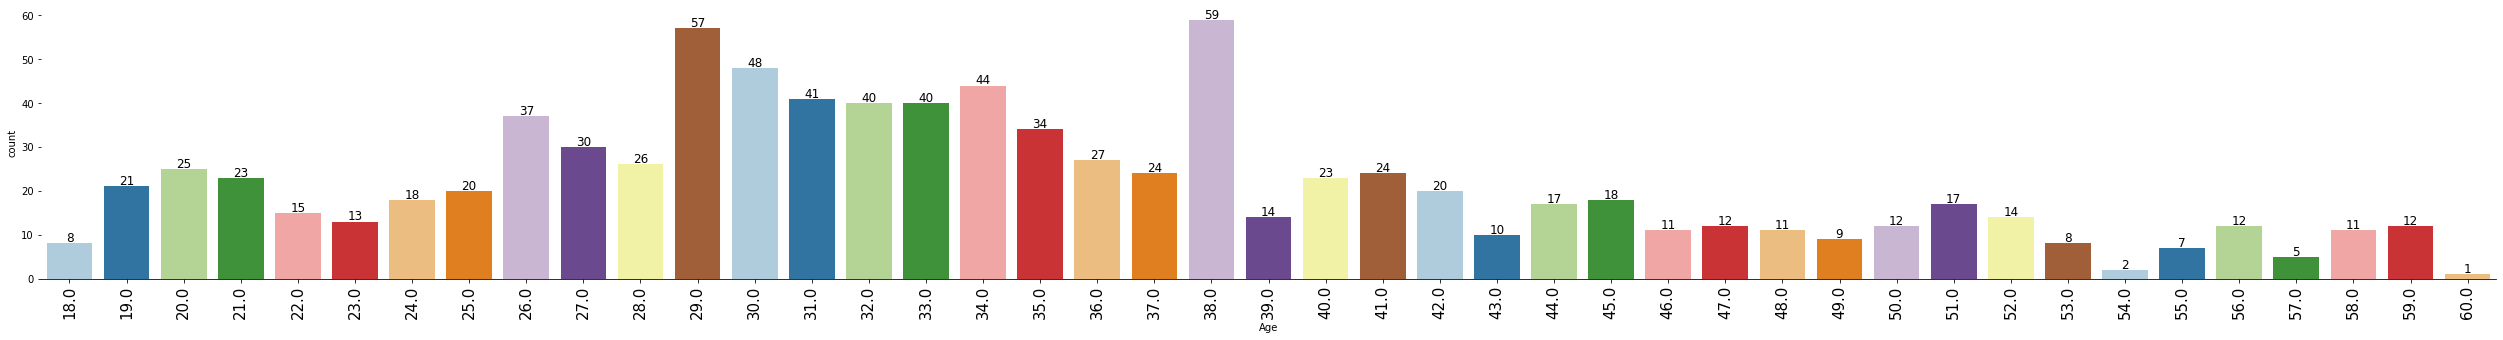

In [122]:
labeled_barplot(data=df_taken, feature='Age')

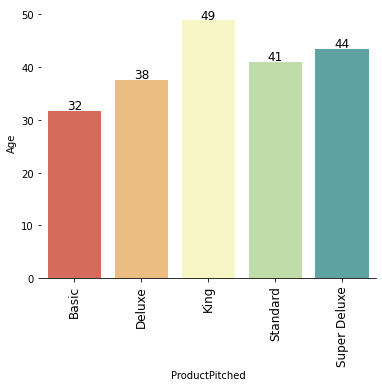

In [123]:
labeled_2dim_barplot(data=df_taken, feature_x='ProductPitched', feature_y='Age')

**Insights**
- Basic
    - Clients are 32 ages old on average
- Deluxe
    - Clients are 38 years old on average
- King
    - Clients are 49 years old on average
- Standard
    - Clients are 41 years old on average
- Super Delux
    - Clients are 44 years old on average

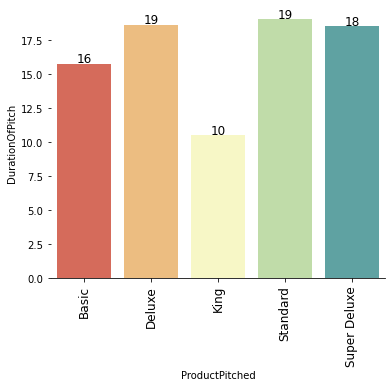

In [124]:
labeled_2dim_barplot(data=df_taken, feature_x='ProductPitched', feature_y = 'DurationOfPitch')

**Insights**
- Basic
    - The pitch duration was 16 minutes on average
- Deluxe
    - The pitch duration was 19 minutes on average
- King
    - The pitch duration was 10 minutes on average
- Standard
    - The pitch duration was 19 minutes on average
- Super Delux
    - The pitch duration was 18 minutes on average


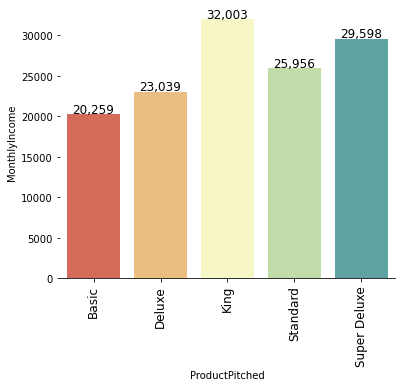

In [125]:
labeled_2dim_barplot(data=df_taken, feature_x='ProductPitched', feature_y = 'MonthlyIncome')

**Insights**
- Basic
    - Clients who took the product have an average around 20,000 USD on average
- Deluxe
    - Clients who took the product have an average around 23,000 USD on average
- King
    - Clients who took the product have an average around 32,000 USD on average
- Standard
    - Clients who took the product have an average around 26,000 USD on average
- Super Delux
    - Clients who took the product have an average around 30,000 USD on average

In [126]:
#Lets see relations with categorical columns
cat_cols

Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation'],
      dtype='object')

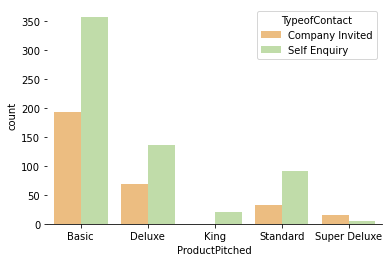

In [127]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="TypeofContact", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Self enquiry clients doubled those who the company invited
- Deluxe
    - Self enquiry clients doubled those who the company invited
- King
    - All clients are Self Enquiry
- Standard
    - Self enquiry clients more than doubled those who the company invited
- Super Delux
    - Company invited clients more than doubled those who are self enquiry

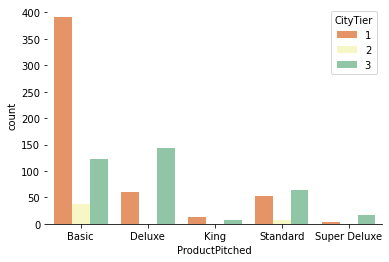

In [128]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="CityTier", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most of the clients live in cities tier 1
- Deluxe
    - Most of the clients live in cities tier 3
- King
    - Clients live in cities tier 1 and tier 3
- Standard
    - Clients live in cities tier 1 and tier 3
- Super Delux
    - Most of the clients live in cities tier 3

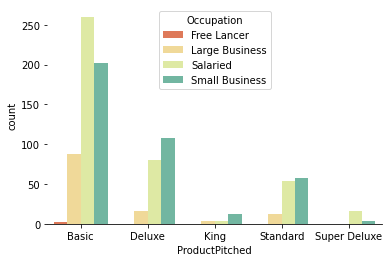

In [129]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="Occupation", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most of the clients are Salaried or work in Small Businesses
- Deluxe
    - Most of the clients are Salaried or work in Small Businesses
- King
    - Most of the clients work in Small Businesses
- Standard
    - Most of the clients are Salaried or work in Small Businesses
- Super Delux
    - Most of the clients are Salaried

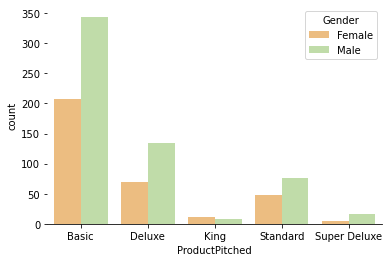

In [130]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="Gender", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most of the clients are men
- Deluxe
    - Most of the clients are men
- King
    - Gender distribution is equal
- Standard
    - Gender distribution is equal
- Super Delux
    - Most of the clients are men

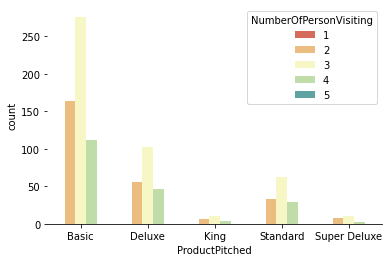

In [131]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="NumberOfPersonVisiting", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most of the clients will be in groups of 3 visitors
- Deluxe
    - Most of the clients will be in groups of 3 visitors
- King
    - Number of visitors distribution is equal
- Standard
    - Most of the clients will be in groups of 3 visitors
- Super Delux
    - Number of visitors distribution is equal

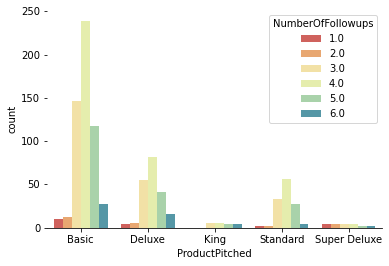

In [132]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="NumberOfFollowups", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - 4 was the mst frequent number of follow ups
- Deluxe
    - 4 was the mst frequent number of follow ups
- King
    - Number of followups distribution is equal
- Standard
    - 4 was the mst frequent number of follow ups
- Super Delux
    - Number of followups distribution is equal

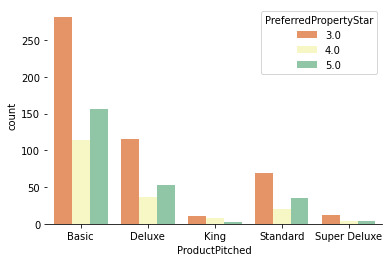

In [133]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="PreferredPropertyStar", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Clients prefer hotels of 3 stars
- Deluxe
    - Clients prefer hotels of 3 stars
- King
    - Clients prefer hotels of 3,4 and 5 stars equally
- Standard
    - Clients prefer hotels of 3 stars
- Super Delux
    - Clients prefer hotels of 3 stars

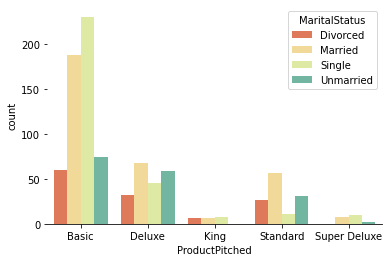

In [134]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="MaritalStatus", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most clients are single or married
- Deluxe
    - Marital status distribution is equal
- King
    - Marital status distribution is equal
- Standard
    - Most clients are married or unmarried
- Super Delux
    - Marital status distribution is equal

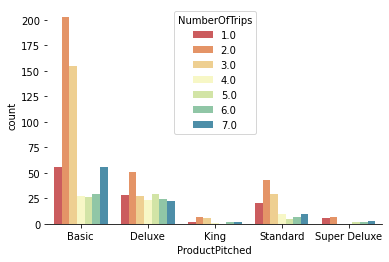

In [135]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="NumberOfTrips", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most clients travel 2 or 3 times per year
- Deluxe
    - Most clients travel 2 times per year
- King
    - Number of trips per year distribution is equal
- Standard
    - Most clients travel 2 times per year
- Super Delux
    - Number of trips per year distribution is equal

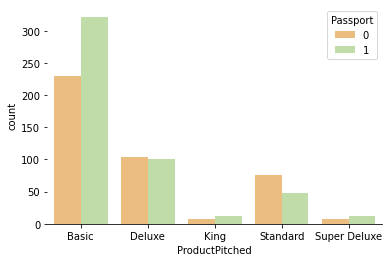

In [136]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="Passport", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most clients own a passport
- Deluxe
    - Passport distribution is equal
- King
    - Passport distribution is equal
- Standard
    - Passport distribution is equal
- Super Delux
    - Passport distribution is equal

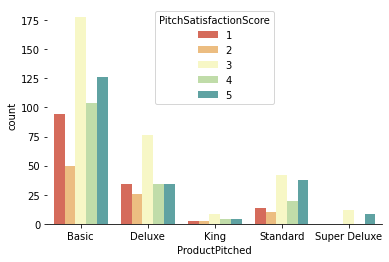

In [137]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="PitchSatisfactionScore", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most clients have a rating of 3 as a satisfaction score
- Deluxe
    - Most clients have a rating of 3 as a satisfaction score
- King
    - Pitch satisfaction score distribution is equal
- Standard
    - Most clients have a rating of 3 or 5 as a satisfaction score
- Super Delux
    - Most clients have a rating of 3 or 5 as a satisfaction score

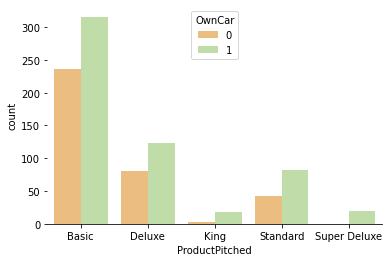

In [138]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="OwnCar", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most clients own a car
- Deluxe
    - Most clients own a car
- King
    - Most clients own a car
- Standard
    - Most clients own a car
- Super Delux
    - All clients own a car

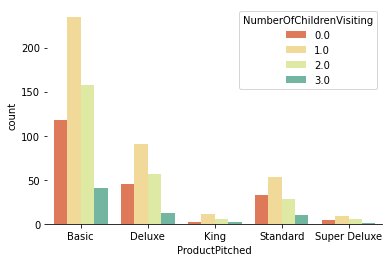

In [139]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="NumberOfChildrenVisiting", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - Most clients will vistit with 1 child
- Deluxe
    - Most clients will vistit with 1 child
- King
    - Most clients will vistit with 1 child
- Standard
    - Most clients will vistit with 1 child
- Super Delux
    - Most clients will vistit with 1 child

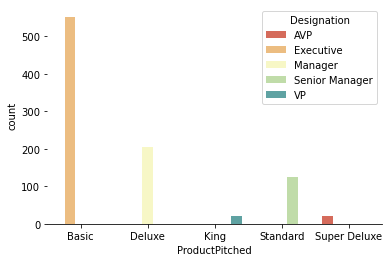

In [140]:
sns.countplot(x="ProductPitched", data=df_taken,  hue="Designation", palette='Spectral')
sns.despine(top=True,right=True,left=True) 

**Insights**
- Basic
    - All clients are executives
- Deluxe
    - All clients are managers
- King
    - All clients are VP
- Standard
    - All clients are senior managers
- Super Delux
    - All clients are AVP

**Customer profiles**

**Basic Package**
- Clients are 32 ages old on average 
- Clients who took the product have an average around 20,000 USD on average
- Self enquiry clients doubled those who the company invited
- Most of the clients live in cities tier 1
- Most of the clients are Salaried or work in Small Businesses
- Most of the clients are men
- Most of the clients will be in groups of 3 visitors
- Clients prefer hotels of 3 stars
- Most clients are single or married
- Most clients travel 2 or 3 times per year
- Most clients own a passport
- Most clients own a car
- Most clients will vistit with 1 child
- All clients are executives

**Deluxe Package**
- Clients are 38 years old on average
- Clients who took the product have an average around 23,000 USD on average
- Self enquiry clients doubled those who the company invited
- Most of the clients live in cities tier 3
- Most of the clients are Salaried or work in Small Businesses
- Most of the clients are men
- Most of the clients will be in groups of 3 visitors
- Clients prefer hotels of 3 stars
- Marital status distribution is equal
- Most clients travel 2 times per year
- Passport distribution is equal
- Most clients own a car
- Most clients will vistit with 1 child
- All clients are managers

**King Package**
- Clients are 49 years old on average
- Clients who took the product have an average around 32,000 USD on average
- All clients are Self Enquiry
- Clients live in cities tier 1 and tier 3
- Most of the clients work in Small Businesses
- Gender distribution is equal
- Number of visitors distribution is equal
- Clients prefer hotels of 3,4 and 5 stars equally
- Marital status distribution is equal
- Number of trips per year distribution is equal
- Passport distribution is equal
- Most clients own a car
- Most clients will vistit with 1 child
- All clients are VP

**Standard Package**
- Clients are 41 years old on average
- Clients who took the product have an average around 26,000 USD on average
- Self enquiry clients more than doubled those who the company invited
- Clients live in cities tier 1 and tier 3
- Most of the clients are Salaried or work in Small Businesses
- Gender distribution is equal
- Most of the clients will be in groups of 3 visitors
- Clients prefer hotels of 3 stars
- Most clients are married or unmarried
- Most clients travel 2 times per year
- Passport distribution is equal
- Most clients own a car
- Most clients will vistit with 1 child
- All clients are senior managers

**Super Deluxe Package**
- Clients are 44 years old on average 
- Clients who took the product have an average around 30,000 USD on average
- Company invited clients more than doubled those who are self enquiry
- Most of the clients live in cities tier 3    
- Most of the clients are Salaried
- Most of the clients are men
- Number of visitors distribution is equal
- Clients prefer hotels of 3 stars
- Marital status distribution is equal
- Number of trips per year distribution is equal
- Passport distribution is equal
- All clients own a car
- Most clients will vistit with 1 child
- All clients are AVP

**Insights summary based on EDA**

- vs TypeofContact no big difference between Company Invited and Self Enquiry vs ProdTaken
- City Tier 1 has a slightly more 0s than 1s
- All freelancers have taken the product (they are only 2 tho) and large business is the one with the bigest proportion of 1s
- Gender does not have a big difference
- Neither 1 and 5 persons visiting are taking the product
- As the number of followups increases so does the products taken (which makes perfect sense)
- Basic and standar product pitches are the most efficient
- 5 stars have the biggest proportion of 1s
- Single and unmarried have bigger proportions of 1s
- 7 number of trips have a bigger proportion of 1s
- People who owns a passport have a significant better chance to take the product
- Pitch satisfaction score of 5 has the biggest chances of 1s
- Owning a car does not make a difference
- Number of children visiting does not have a difference
- Executives have a much better chance to take the product followed by senior managers
- Basic and deluxe products have more chances of getting 0s than 1s
- The age of people who buys a Basic product seems to be non important (people of all ages seems to have the same chances of getting it)
- People of mid 30s and early 50s buy Delux Product
- King product who has taken the product are from late 20s and mid to late 50s
- Standard product is taken by people of all ages
- Super Deluxe product is preferred by people of early 40s
- All Basic product pitches to clients with Income bigger than 24k took the product
- All Delux product pitches to clients with Income bigger than 29k took the product
- All King product pitches to clients with Income lower than 22k took the product
- Standar product started to get rejected by clients with Income bigger than 22k
- Super Delux product does not get affected in a particuar way by Income



## Data engineering

**Drop columns**

We will drop Customer interaction columns, since they will not exist in the future for predicting 

In [141]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [142]:
customer_interaction_cols = ['PitchSatisfactionScore', 'ProductPitched', 'NumberOfFollowups', 'DurationOfPitch']
for col in customer_interaction_cols:
    df.drop(col, axis=1, inplace=True)

In [143]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'MonthlyIncome'],
      dtype='object')

## Data Preparataion for model building

**Dummies**

We will create X and y and will create dummies for every categorical column

In [144]:
X = df.drop('ProdTaken', axis=1)
X = pd.get_dummies(X,drop_first=True)

y = df['ProdTaken']

In [145]:
X.columns, len(X.columns)

(Index(['Age', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'CityTier_2',
        'CityTier_3', 'Occupation_Large Business', 'Occupation_Salaried',
        'Occupation_Small Business', 'Gender_Male', 'NumberOfPersonVisiting_2',
        'NumberOfPersonVisiting_3', 'NumberOfPersonVisiting_4',
        'NumberOfPersonVisiting_5', 'PreferredPropertyStar_4.0',
        'PreferredPropertyStar_5.0', 'MaritalStatus_Married',
        'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'NumberOfTrips_2.0',
        'NumberOfTrips_3.0', 'NumberOfTrips_4.0', 'NumberOfTrips_5.0',
        'NumberOfTrips_6.0', 'NumberOfTrips_7.0', 'Passport_1', 'OwnCar_1',
        'NumberOfChildrenVisiting_1.0', 'NumberOfChildrenVisiting_2.0',
        'NumberOfChildrenVisiting_3.0', 'Designation_Executive',
        'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
       dtype='object'),
 33)

# Model building

## Split the data

In [146]:
#lets see how balanced is our data
df.ProdTaken.value_counts(normalize=True)

0   0.81
1   0.19
Name: ProdTaken, dtype: float64

In [147]:
# We have very unbalanced data, we will use 'stratify' 
# parameter to preserve that imbalance in both train 
# and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
print('Shape of X_train: ',X_train.shape)
print('\nShape of X_test: ',X_test.shape)
print('\nDistribution of y_train')
print(y_train.value_counts(normalize=True))
print('\nDistribution of y_test')
print(y_test.value_counts(normalize=True))



Shape of X_train:  (3421, 33)

Shape of X_test:  (1467, 33)

Distribution of y_train
0   0.81
1   0.19
Name: ProdTaken, dtype: float64

Distribution of y_test
0   0.81
1   0.19
Name: ProdTaken, dtype: float64


## Model building - Bagging

### Bagging Classifier

In [148]:
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [149]:
bagging_score_train, bagging_score_test = get_metrics_score(bagging_estimator, 'Bagging')

----- Train scores -----
Accuracy on training set :  0.9912306343174511
Recall on training set :  0.9580745341614907
Precision on training set :  0.9951612903225806
F1 on training set :  0.9762658227848101
----- Test scores -----
Accuracy on test set :  0.8916155419222904
Recall on test set :  0.5181159420289855
Precision on test set :  0.8461538461538461
F1 on test set :  0.6426966292134831


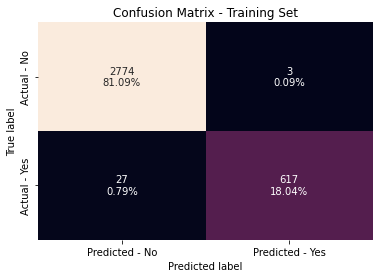

In [150]:
pred_train = bagging_estimator.predict(X_train)
make_confusion_matrix(bagging_estimator,y_train, pred_train, 'Confusion Matrix - Training Set')

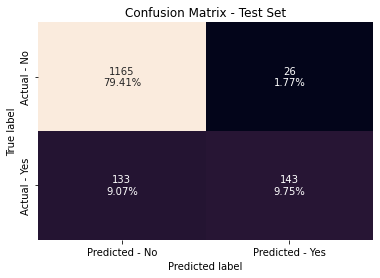

In [151]:
pred_test = bagging_estimator.predict(X_test)
make_confusion_matrix(bagging_estimator, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- There is a clear overfitting
- Due to the fall of recall score from 95.8% on training set to 51.8% on test set
- Precision is also falling

### Decision Tree

In [152]:
# Due to the imabalance in the data we will use class_weight parameter
d_tree = DecisionTreeClassifier(random_state=1, class_weight={0:0.19, 1:0.81})
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [153]:
d_tree_score_train, d_tree_score_test = get_metrics_score(d_tree, 'Decision Tree')

----- Train scores -----
Accuracy on training set :  1.0
Recall on training set :  1.0
Precision on training set :  1.0
F1 on training set :  1.0
----- Test scores -----
Accuracy on test set :  0.8663940013633266
Recall on test set :  0.5905797101449275
Precision on test set :  0.6626016260162602
F1 on test set :  0.6245210727969348


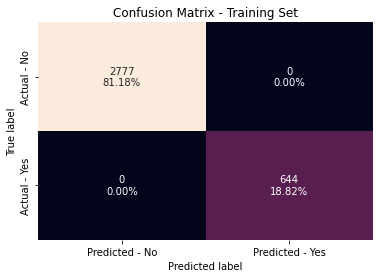

In [154]:
pred_train = d_tree.predict(X_train)
make_confusion_matrix(d_tree,y_train, pred_train, 'Confusion Matrix - Training Set')

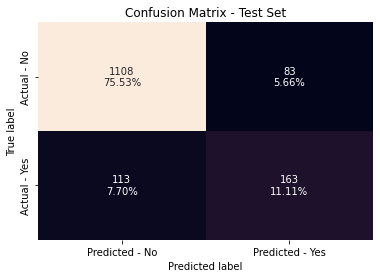

In [155]:
pred_test = d_tree.predict(X_test)
make_confusion_matrix(d_tree, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- As expected scores are 100% on training set
- There is data overfiting
- Recall and precision scores dropped significatively on test set

### Random Forest

In [156]:
#Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1, class_weight={0:0.19, 1:0.81})
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [157]:
rf_score_train, rf_score_test = get_metrics_score(rf_estimator, 'Random Forest')

----- Train scores -----
Accuracy on training set :  1.0
Recall on training set :  1.0
Precision on training set :  1.0
F1 on training set :  1.0
----- Test scores -----
Accuracy on test set :  0.8677573278800272
Recall on test set :  0.35144927536231885
Precision on test set :  0.8660714285714286
F1 on test set :  0.5


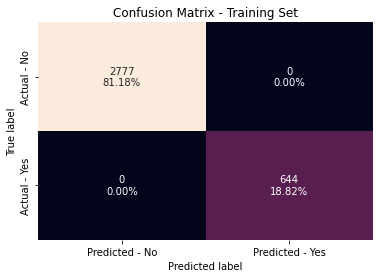

In [158]:
pred_train = rf_estimator.predict(X_train)
make_confusion_matrix(rf_estimator, y_train, pred_train, 'Confusion Matrix - Training Set')

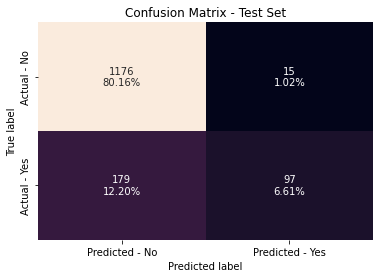

In [159]:
pred_test = rf_estimator.predict(X_test)
make_confusion_matrix(rf_estimator, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observation**
- Training scores are 100% as expected
- There is a clear overfitting
- Recall score dropped to 35% on test set

## Model performance improvement - Bagging

### Metric selection

Lets define the impact and cost that a false positive and a false negative have on the business:

- **False Positive**
    - Model is **predicting Yes (1)** but in reality that client will not take the product. 
    - This generates a loss due to operational costs (Pitching the product, and doing followup calls among others)
- **False Negatives**
    - Model **predicted No (0)** when in reality it was a client who would take the product
    - This represents a cost of oportunuiity because the business did not contact and sold a product
    
If we assume that the company will not have to hire more personnel to make the pitches and followups then the False Negatives are a bigger issue than the False Positives. So the metric we will focuse on is **Recall Score** 

### Tuning Bagging Classifier

In [160]:
%%time

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
# As we said earlier we will focus on RECALL score
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

CPU times: user 1min 25s, sys: 2.05 s, total: 1min 27s
Wall time: 1min 45s


BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=40,
                  random_state=1)

In [161]:
bagging_tuned_train, bagging_tuned_test = get_metrics_score(bagging_estimator_tuned, 'Bagging - Tuned')

----- Train scores -----
Accuracy on training set :  0.9982461268634902
Recall on training set :  0.9906832298136646
Precision on training set :  1.0
F1 on training set :  0.9953198127925117
----- Test scores -----
Accuracy on test set :  0.8984321745057942
Recall on test set :  0.5217391304347826
Precision on test set :  0.8944099378881988
F1 on test set :  0.6590389016018307


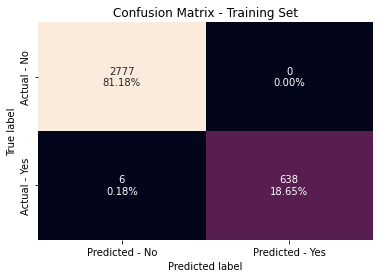

In [162]:
pred_train = bagging_estimator_tuned.predict(X_train)
make_confusion_matrix(bagging_estimator_tuned, y_train, pred_train, 'Confusion Matrix - Training Set')

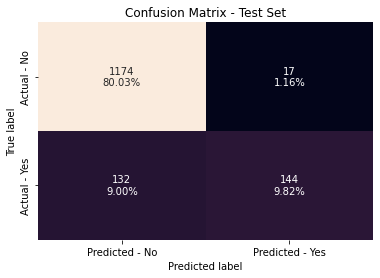

In [163]:
pred_test = bagging_estimator_tuned.predict(X_test)
make_confusion_matrix(bagging_estimator_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

### Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [164]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,
                                                               max_iter=100),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [165]:
bagging_tuned_lr_train, bagging_tuned_lr_test = get_metrics_score(bagging_lr, 'Bagging - Linear R - Tuned')

----- Train scores -----
Accuracy on training set :  0.8117509500146156
Recall on training set :  0.0
Precision on training set :  0.0
F1 on training set :  0.0
----- Test scores -----
Accuracy on test set :  0.8118609406952966
Recall on test set :  0.0
Precision on test set :  0.0
F1 on test set :  0.0


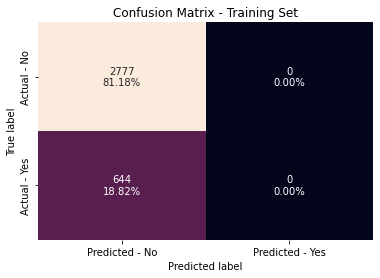

In [166]:
pred_train = bagging_lr.predict(X_train)
make_confusion_matrix(bagging_lr, y_train, pred_train, 'Confusion Matrix - Training Set')

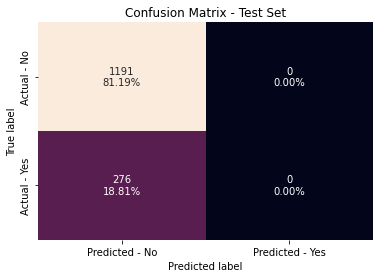

In [167]:
pred_test = bagging_lr.predict(X_test)
make_confusion_matrix(bagging_lr, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Tuned model is overfitting, its recall score on test set is still very low
- Tuning with linear regression as base estimator is not working all predicted values are No (0)

### Tuning Decision Tree

In [168]:
# Choose the type of classifier. 
dt_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1, 10, 1), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
# As we said earlier we will focus on RECALL score
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

In [169]:
dtree_tuned_train, dtree_tuned_test = get_metrics_score(dt_tuned, 'Decision Tree - Tuned')

----- Train scores -----
Accuracy on training set :  0.8213972522654195
Recall on training set :  0.3416149068322981
Precision on training set :  0.5405405405405406
F1 on training set :  0.4186489058039962
----- Test scores -----
Accuracy on test set :  0.8411724608043627
Recall on test set :  0.3695652173913043
Precision on test set :  0.6335403726708074
F1 on test set :  0.4668192219679634


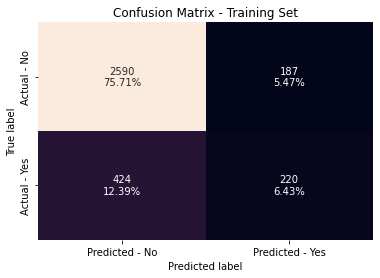

In [170]:
pred_train = dt_tuned.predict(X_train)
make_confusion_matrix(dt_tuned, y_train, pred_train, 'Confusion Matrix - Training Set')

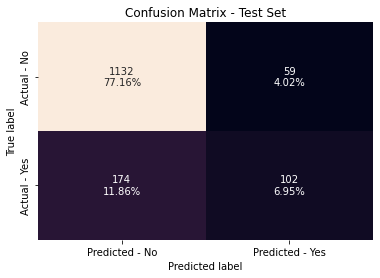

In [171]:
pred_test = dt_tuned.predict(X_test)
make_confusion_matrix(dt_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is not overfitting but:
- Recall score is very low in both train and test sets

### Tuning Random Forest

In [172]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth":[5,10],
    "n_estimators": [100,150,250],
    "min_samples_leaf": np.arange(5, 9, 2),
    "max_features": np.arange(0.2, 0.5, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.2)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=5,
                       max_features=0.4000000000000001, max_samples=0.5,
                       min_samples_leaf=7, random_state=1)

In [173]:
rf_tuned_train, rf_tuned_test = get_metrics_score(rf_tuned, 'Random Forest - Tuned')

----- Train scores -----
Accuracy on training set :  0.8243203741596025
Recall on training set :  0.6335403726708074
Precision on training set :  0.5278137128072445
F1 on training set :  0.5758645024700071
----- Test scores -----
Accuracy on test set :  0.8261758691206544
Recall on test set :  0.6159420289855072
Precision on test set :  0.5329153605015674
F1 on test set :  0.5714285714285714


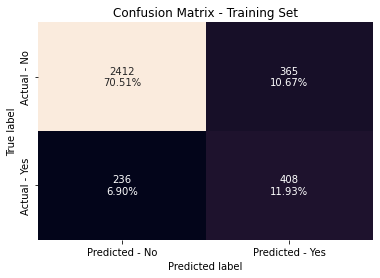

In [174]:
pred_train = rf_tuned.predict(X_train)
make_confusion_matrix(rf_tuned, y_train, pred_train, 'Confusion Matrix - Training Set')

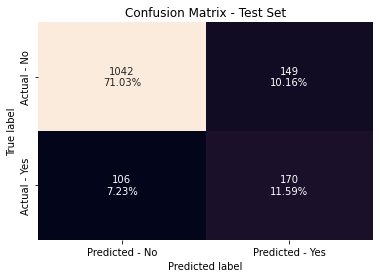

In [175]:
pred_test = rf_tuned.predict(X_test)
make_confusion_matrix(rf_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is not overfitting 
- Recall score on test set is a little better than in training set

### Bagging model comparison

In [176]:
# training performance comparison

bagging_train_df = pd.concat(
    [
        pd.DataFrame(bagging_score_train),
        pd.DataFrame(d_tree_score_train),
        pd.DataFrame(rf_score_train),
        pd.DataFrame(bagging_tuned_train),
        pd.DataFrame(bagging_tuned_lr_train),
        pd.DataFrame(dtree_tuned_train),
        pd.DataFrame(rf_tuned_train)
    ],
    axis=1,
).T
bagging_train_df.columns = [
    "Model",
    "Accuracy",
    "Recall Score",
    "Precision Score",
    "F1 Score"
]
print("Training set performance comparison:")
bagging_train_df.reset_index(drop=True).sort_values('Recall Score', ascending=False)

Training set performance comparison:


,Model,Accuracy,Recall Score,Precision Score,F1 Score
1,Decision Tree,1.00,1.00,1.00,1.00
2,Random Forest,1.00,1.00,1.00,1.00
3,Bagging - Tuned,1.00,0.99,1.00,1.00
0,Bagging,0.99,0.96,1.00,0.98
6,Random Forest - Tuned,0.82,0.63,0.53,0.58
5,Decision Tree - Tuned,0.82,0.34,0.54,0.42
4,Bagging - Linear R - Tuned,0.81,0.00,0.00,0.00


In [177]:
# testing performance comparison

bagging_test_df = pd.concat(
    [
        pd.DataFrame(bagging_score_test),
        pd.DataFrame(d_tree_score_test),
        pd.DataFrame(rf_score_test),
        pd.DataFrame(bagging_tuned_test),
        pd.DataFrame(bagging_tuned_lr_test),
        pd.DataFrame(dtree_tuned_test),
        pd.DataFrame(rf_tuned_test)
    ],
    axis=1,
).T
bagging_test_df.columns = [
    "Model",
    "Accuracy",
    "Recall Score",
    "Precision Score",
    "F1 Score"
]
print("Test set performance comparison:")
bagging_test_df.reset_index(drop=True).sort_values('Recall Score', ascending=False)

Test set performance comparison:


,Model,Accuracy,Recall Score,Precision Score,F1 Score
6,Random Forest - Tuned,0.83,0.62,0.53,0.57
1,Decision Tree,0.87,0.59,0.66,0.62
3,Bagging - Tuned,0.90,0.52,0.89,0.66
0,Bagging,0.89,0.52,0.85,0.64
5,Decision Tree - Tuned,0.84,0.37,0.63,0.47
2,Random Forest,0.87,0.35,0.87,0.50
4,Bagging - Linear R - Tuned,0.81,0.00,0.00,0.00


**Best bagging model**

`Random Forest - Tuned` is the model who has the **best recall score** on **test set** which means that is the model that will better predict unseen data 

`Random Forest - Tuned` is **not overfitting**, the differences between recall, precision, f1 and accuracy scores in training and testing sets are lower than 2%

### Adaboost

In [178]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [179]:
abc_train, abc_test = get_metrics_score(abc, 'Adaboost')

----- Train scores -----
Accuracy on training set :  0.8479976615024847
Recall on training set :  0.2701863354037267
Precision on training set :  0.7767857142857143
F1 on training set :  0.4009216589861751
----- Test scores -----
Accuracy on test set :  0.8398091342876619
Recall on test set :  0.26811594202898553
Precision on test set :  0.6915887850467289
F1 on test set :  0.3864229765013055


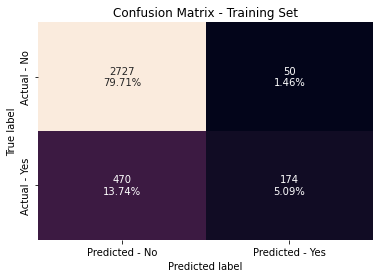

In [180]:
pred_train = abc.predict(X_train)
make_confusion_matrix(abc, y_train, pred_train, 'Confusion Matrix - Training Set')

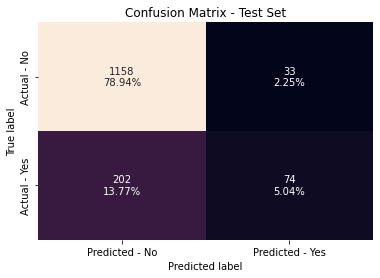

In [181]:
pred_test = abc.predict(X_test)
make_confusion_matrix(abc, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is not overfitting
- Recall score on both sets is very low

### GradientBoosting

In [182]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [183]:
gbc_train, gbc_test = get_metrics_score(gbc, 'GradientBoost')

----- Train scores -----
Accuracy on training set :  0.8830751242326805
Recall on training set :  0.4440993788819876
Precision on training set :  0.8719512195121951
F1 on training set :  0.588477366255144
----- Test scores -----
Accuracy on test set :  0.8588957055214724
Recall on test set :  0.36231884057971014
Precision on test set :  0.7633587786259542
F1 on test set :  0.4914004914004914


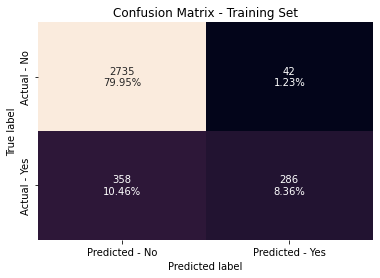

In [184]:
pred_train = gbc.predict(X_train)
make_confusion_matrix(gbc, y_train, pred_train, 'Confusion Matrix - Training Set')

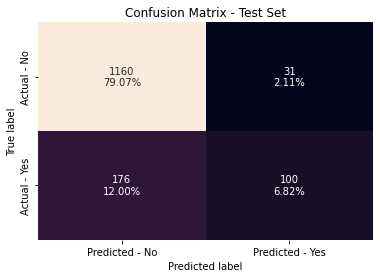

In [185]:
pred_test = gbc.predict(X_test)
make_confusion_matrix(gbc, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is not overfitting
- Recall score on both sets is very low

### XGBoosting

In [186]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [187]:
xgb_train, xgb_test = get_metrics_score(xgb, 'XG Boosting')

----- Train scores -----
Accuracy on training set :  0.9967845659163987
Recall on training set :  0.9829192546583851
Precision on training set :  1.0
F1 on training set :  0.9913860610806579
----- Test scores -----
Accuracy on test set :  0.9032038173142468
Recall on test set :  0.5833333333333334
Precision on test set :  0.8563829787234043
F1 on test set :  0.6939655172413794


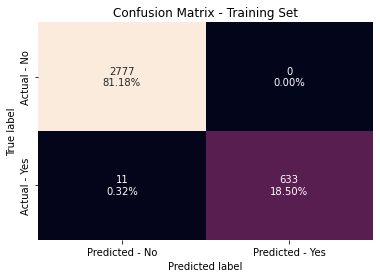

In [188]:
pred_train = xgb.predict(X_train)
make_confusion_matrix(xgb, y_train, pred_train, 'Confusion Matrix - Training Set')

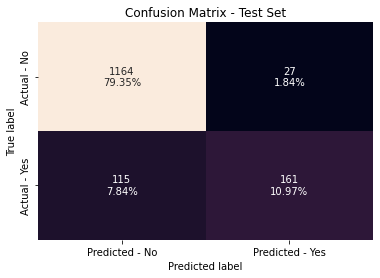

In [189]:
pred_test = xgb.predict(X_test)
make_confusion_matrix(xgb, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is overfitting
- Recall score on test sets is low

## Model performance improvement - Boosting

### Tuning Adaboost

In [190]:
%%time 

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),
                      DecisionTreeClassifier(max_depth=2, random_state=1),
                      DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate":np.arange(0.1, 2, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

CPU times: user 24min 12s, sys: 26.6 s, total: 24min 39s
Wall time: 44min 2s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.7000000000000002, n_estimators=100,
                   random_state=1)

In [191]:
abc_tuned_train, abc_tuned_test = get_metrics_score(abc_tuned, 'Adaboost - Tuned')

----- Train scores -----
Accuracy on training set :  0.9593686056708565
Recall on training set :  0.8586956521739131
Precision on training set :  0.9201331114808652
F1 on training set :  0.8883534136546185
----- Test scores -----
Accuracy on test set :  0.8513974096796183
Recall on test set :  0.5615942028985508
Precision on test set :  0.6150793650793651
F1 on test set :  0.5871212121212122


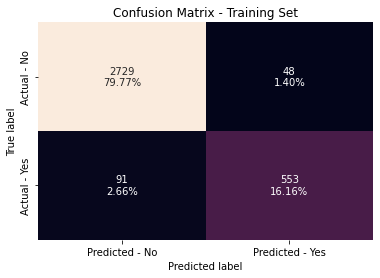

In [192]:
pred_train = abc_tuned.predict(X_train)
make_confusion_matrix(abc_tuned, y_train, pred_train, 'Confusion Matrix - Training Set')

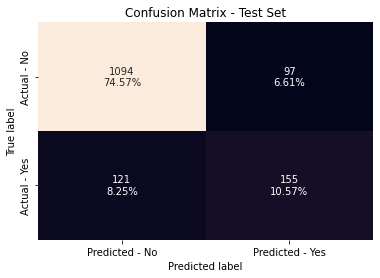

In [193]:
pred_test = abc_tuned.predict(X_test)
make_confusion_matrix(abc_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is overfitting
- Recall score on test set is 57%

### Tuning GradientBoosting

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [194]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [195]:
gbc_init_train, gbc_init_test = get_metrics_score(gbc_init, 'GradientBoost - Init')

----- Train scores -----
Accuracy on training set :  0.8810289389067524
Recall on training set :  0.43167701863354035
Precision on training set :  0.8714733542319749
F1 on training set :  0.57736240913811
----- Test scores -----
Accuracy on test set :  0.8643490115882754
Recall on test set :  0.37681159420289856
Precision on test set :  0.7938931297709924
F1 on test set :  0.5110565110565111


**As compared to the model with default parameters:**

- Test accuracy and test recall have increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [196]:
%%time

# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 250],
    "subsample":[0.8, 0.9, 1],
    "max_features":[0.7, 0.85, 1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

CPU times: user 2min 56s, sys: 2.74 s, total: 2min 59s
Wall time: 6min 17s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.85, n_estimators=250, random_state=1,
                           subsample=0.9)

In [197]:
gbc_tuned_train, gbc_tuned_test = get_metrics_score(gbc_tuned, 'GradientBoost - Tuned')

----- Train scores -----
Accuracy on training set :  0.9085062847120725
Recall on training set :  0.5698757763975155
Precision on training set :  0.9106699751861043
F1 on training set :  0.7010506208213944
----- Test scores -----
Accuracy on test set :  0.8711656441717791
Recall on test set :  0.4420289855072464
Precision on test set :  0.7770700636942676
F1 on test set :  0.5635103926096998


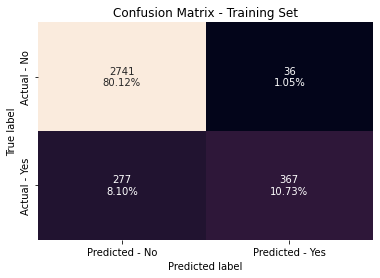

In [198]:
pred_train = gbc_tuned.predict(X_train)
make_confusion_matrix(gbc_tuned, y_train, pred_train, 'Confusion Matrix - Training Set')

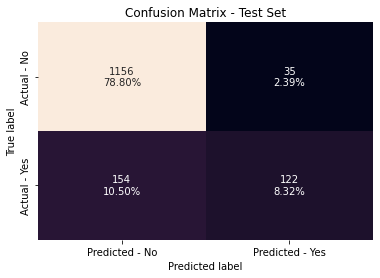

In [199]:
pred_test = gbc_tuned.predict(X_test)
make_confusion_matrix(gbc_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is overfitting
- Recall score on test set is very low

### Tuning XGBoosting

In [200]:
%%time

# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight":[0, 2, 5],
    "subsample":[0.5, 0.75, 1],
    "learning_rate":[0.01, 0.1, 0.2],
    "gamma":[0, 1, 3],
    "colsample_bytree":[0.5, 0.75, 1],
    "colsample_bylevel":[0.5, 0.75, 1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

CPU times: user 3h 16min 22s, sys: 4min 45s, total: 3h 21min 7s
Wall time: 2h 13min 24s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [201]:
xgb_tuned_train, xgb_tuned_test = get_metrics_score(xgb_tuned, 'XG Boosting - Tuned')

----- Train scores -----
Accuracy on training set :  0.8187664425606548
Recall on training set :  0.8416149068322981
Precision on training set :  0.5113207547169811
F1 on training set :  0.636150234741784
----- Test scores -----
Accuracy on test set :  0.7770961145194274
Recall on test set :  0.7427536231884058
Precision on test set :  0.44468546637744033
F1 on test set :  0.5563093622795114


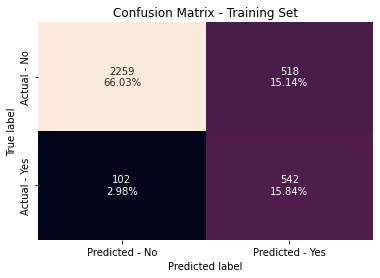

In [202]:
pred_train = xgb_tuned.predict(X_train)
make_confusion_matrix(xgb_tuned, y_train, pred_train, 'Confusion Matrix - Training Set')

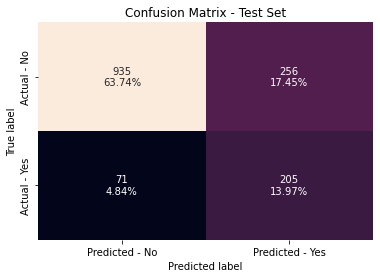

In [203]:
pred_test = xgb_tuned.predict(X_test)
make_confusion_matrix(xgb_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is not overfitting
- Recall score on both sets is higher than 74%

### Boosting model comparison

In [204]:
# train performance comparison

boosting_train_df = pd.concat(
    [
        pd.DataFrame(abc_train),
        pd.DataFrame(gbc_train),
        pd.DataFrame(xgb_train),
        pd.DataFrame(abc_tuned_train),
        pd.DataFrame(gbc_init_train),
        pd.DataFrame(gbc_tuned_train),
        pd.DataFrame(xgb_tuned_train)
    ],
    axis=1,
).T
boosting_train_df.columns = [
    "Model",
    "Accuracy",
    "Recall Score",
    "Precision Score",
    "F1 Score"
]
print("Training set performance comparison:")
boosting_train_df.reset_index(drop=True).sort_values('Recall Score', ascending=False)

Training set performance comparison:


,Model,Accuracy,Recall Score,Precision Score,F1 Score
2,XG Boosting,1.00,0.98,1.00,0.99
3,Adaboost - Tuned,0.96,0.86,0.92,0.89
6,XG Boosting - Tuned,0.82,0.84,0.51,0.64
5,GradientBoost - Tuned,0.91,0.57,0.91,0.70
1,GradientBoost,0.88,0.44,0.87,0.59
4,GradientBoost - Init,0.88,0.43,0.87,0.58
0,Adaboost,0.85,0.27,0.78,0.40


In [205]:
# test performance comparison

boosting_test_df = pd.concat(
    [
        pd.DataFrame(abc_test),
        pd.DataFrame(gbc_test),
        pd.DataFrame(xgb_test),
        pd.DataFrame(abc_tuned_test),
        pd.DataFrame(gbc_init_test),
        pd.DataFrame(gbc_tuned_test),
        pd.DataFrame(xgb_tuned_test)
    ],
    axis=1,
).T
boosting_test_df.columns = [
    "Model",
    "Accuracy",
    "Recall Score",
    "Precision Score",
    "F1 Score"
]
print("Training set performance comparison:")
boosting_test_df.reset_index(drop=True).sort_values('Recall Score', ascending=False)

Training set performance comparison:


,Model,Accuracy,Recall Score,Precision Score,F1 Score
6,XG Boosting - Tuned,0.78,0.74,0.44,0.56
2,XG Boosting,0.90,0.58,0.86,0.69
3,Adaboost - Tuned,0.85,0.56,0.62,0.59
5,GradientBoost - Tuned,0.87,0.44,0.78,0.56
4,GradientBoost - Init,0.86,0.38,0.79,0.51
1,GradientBoost,0.86,0.36,0.76,0.49
0,Adaboost,0.84,0.27,0.69,0.39


**Best boosting model**

`XG Boosting - Tuned` is the model who has the **best recall score** on **test set** which means that is the model that will better predict unseen data 

`XG Boosting - Tuned` is **not overfitting**, the differences between recall, precision, f1 and accuracy scores in training and testing sets are lower than 10%

### Stacking classifiers

Let's build a **stacking model** with the tuned models:
- Decision Tree
- Random Forest
- Adaboost
- Gradient Boosting

Then use **XGBoost** to get the final prediction.**

In [206]:
estimators=[('Decision Tree', dt_tuned),
            ('Random Forest', rf_tuned),
            ('AdaBoost',abc_tuned),
            ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1, eval_metric='logloss')

In [207]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=2,
                                                       max_leaf_nodes=3,
                                                       min_impurity_decrease=0.001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=5,
                                                       max_features=0.4000000000000001,
                                                       max_samples=0.5,
                                                       min_samples_leaf=7,
                                                       random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_e...
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1,
                                                 reg_alpha=None,
                                                 reg_lambda=None,
                                                 scale_pos_weight=None,
                                                 subsample=None,
                                                 tree_method=None,
                                                 validate_parameters=None,
                                                 verbosity=None),
                   n_jobs=-1)

In [208]:
stacking_train, stacking_test = get_metrics_score(stacking_estimator, 'Stacking')

----- Train scores -----
Accuracy on training set :  0.9304296989184448
Recall on training set :  0.7329192546583851
Precision on training set :  0.8773234200743495
F1 on training set :  0.7986463620981389
----- Test scores -----
Accuracy on test set :  0.8493524199045671
Recall on test set :  0.5362318840579711
Precision on test set :  0.6141078838174274
F1 on test set :  0.5725338491295938


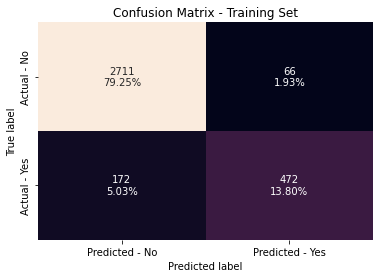

In [209]:
pred_train = stacking_estimator.predict(X_train)
make_confusion_matrix(stacking_estimator, y_train, pred_train, 'Confusion Matrix - Training Set')

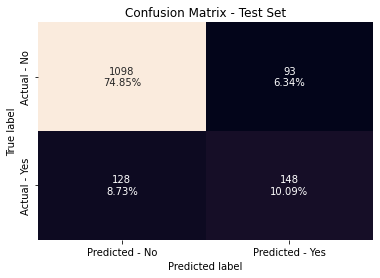

In [210]:
pred_test = stacking_estimator.predict(X_test)
make_confusion_matrix(stacking_estimator, y_test, pred_test, 'Confusion Matrix - Test Set')

**Observations**
- Model is  overfitting
- Recall score on test set is low

# Actionable Insights & Recommendations

### Final model comparison

We will compare the best bagging model vs the best boosting model vs the stacking model

We will choose between them the one with the better Recall Score since is the metric that we defined as more important

In [211]:
# train performance comparison

model_train_df = pd.concat(
    [
        pd.DataFrame(rf_tuned_train),
        pd.DataFrame(xgb_tuned_train),
        pd.DataFrame(stacking_train)
    ],
    axis=1
).T
model_train_df.columns = [
    "Model",
    "Accuracy",
    "Recall Score",
    "Precision Score",
    "F1 Score"
]
print("Training set performance comparison:")
model_train_df.reset_index(drop=True).sort_values('Recall Score', ascending=False)

Training set performance comparison:


,Model,Accuracy,Recall Score,Precision Score,F1 Score
1,XG Boosting - Tuned,0.82,0.84,0.51,0.64
2,Stacking,0.93,0.73,0.88,0.80
0,Random Forest - Tuned,0.82,0.63,0.53,0.58


In [214]:
# test performance comparison

model_test_df = pd.concat(
    [
        pd.DataFrame(rf_tuned_test),
        pd.DataFrame(xgb_tuned_test),
        pd.DataFrame(stacking_test)
    ],
    axis=1,
).T
model_test_df.columns = [
    "Model",
    "Accuracy",
    "Recall Score",
    "Precision Score",
    "F1 Score"
]
print("Testing set performance comparison:")
model_test_df.reset_index(drop=True).sort_values('Recall Score', ascending=False)

Testing set performance comparison:


,Model,Accuracy,Recall Score,Precision Score,F1 Score
1,XG Boosting - Tuned,0.78,0.74,0.44,0.56
0,Random Forest - Tuned,0.83,0.62,0.53,0.57
2,Stacking,0.85,0.54,0.61,0.57


**Observations**
- We can see that in test set (unseen data) `XG Boosting - Tuned` has the better recall score it is 12% superior to the next model
- And we can see that it came with a cost, from the 3 finalists `XG Boosting - Tuned` has the worst precision and F1 scores

**Best model overall**

`XG Boosting - Tuned` is the model who has the **best recall score** on **test set** which means that is the model that will better predict unseen data 

`Random Forest - Tuned` is **not overfitting**, the differences between recall, precision, f1 and accuracy scores in training and testing sets are lower than 10%


Since our model selected was `XG Boosting - Tuned` lets see the most **important features**

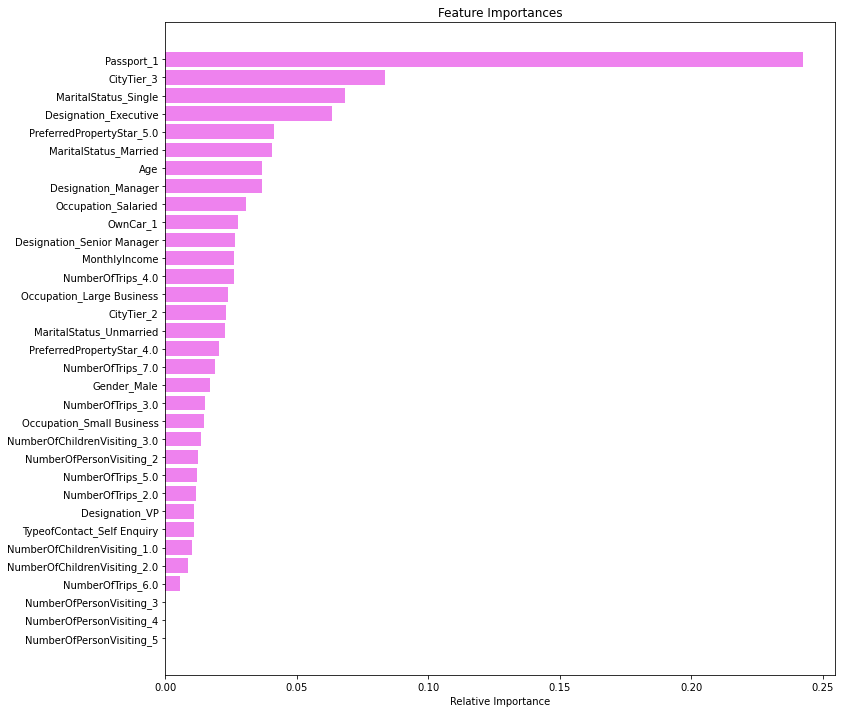

In [213]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Business recomendations

- We have a model that can:
    - Help the company to **identify new customers** who will be interesteed in purchsing a Travel Package
    - Help the company understand the **key features** in order to **target and advertise to new customers**

- We also know the key features of our model:
    - Passport_1 (means customer **owns a passport**)
    - City Tier_3 (means customer lives in a **tier 3 city**)
    - Marital_Status_Single (means customer is **Single**)
    - Designation_Executive (means customer designation is an **Executive**)
    - PreferredPropertyStar_5 (means customer prefer 5 stars hotels)

- Customers who lives in a city tier 3, are single, their designation is executive, travels to a 5 stars hotel and own a passport have higher chances of taking a travel package.

- We left out of the model factors from customer interaction, but based on our analysis (EDA) they can help improve the chances of a customer taking the product, they are:
    - Pitch duration
    - Pitch satisfaction score
    - Make multiple followups
    
- We have created a customer profile for each package:
    - **Basic Package**
        - Clients are 32 ages old on average 
        - Clients who took the product have an average around 20,000 USD on average
        - Self enquiry clients doubled those who the company invited
        - Most of the clients live in cities tier 1
        - Most of the clients are Salaried or work in Small Businesses
        - Most of the clients are men
        - Most of the clients will be in groups of 3 visitors
        - Clients prefer hotels of 3 stars
        - Most clients are single or married
        - Most clients travel 2 or 3 times per year
        - Most clients own a passport
        - Most clients own a car
        - Most clients will vistit with 1 child
        - All clients are executives

    - **Deluxe Package**
        - Clients are 38 years old on average
        - Clients who took the product have an average around 23,000 USD on average
        - Self enquiry clients doubled those who the company invited
        - Most of the clients live in cities tier 3
        - Most of the clients are Salaried or work in Small Businesses
        - Most of the clients are men
        - Most of the clients will be in groups of 3 visitors
        - Clients prefer hotels of 3 stars
        - Marital status distribution is equal
        - Most clients travel 2 times per year
        - Passport distribution is equal
        - Most clients own a car
        - Most clients will vistit with 1 child
        - All clients are managers

    - **King Package**
        - Clients are 49 years old on average
        - Clients who took the product have an average around 32,000 USD on average
        - All clients are Self Enquiry
        - Clients live in cities tier 1 and tier 3
        - Most of the clients work in Small Businesses
        - Gender distribution is equal
        - Number of visitors distribution is equal
        - Clients prefer hotels of 3,4 and 5 stars equally
        - Marital status distribution is equal
        - Number of trips per year distribution is equal
        - Passport distribution is equal
        - Most clients own a car
        - Most clients will vistit with 1 child
        - All clients are VP

    - **Standard Package**
        - Clients are 41 years old on average
        - Clients who took the product have an average around 26,000 USD on average
        - Self enquiry clients more than doubled those who the company invited
        - Clients live in cities tier 1 and tier 3
        - Most of the clients are Salaried or work in Small Businesses
        - Gender distribution is equal
        - Most of the clients will be in groups of 3 visitors
        - Clients prefer hotels of 3 stars
        - Most clients are married or unmarried
        - Most clients travel 2 times per year
        - Passport distribution is equal
        - Most clients own a car
        - Most clients will vistit with 1 child
        - All clients are senior managers

    - **Super Deluxe Package**
        - Clients are 44 years old on average 
        - Clients who took the product have an average around 30,000 USD on average
        - Company invited clients more than doubled those who are self enquiry
        - Most of the clients live in cities tier 3    
        - Most of the clients are Salaried
        - Most of the clients are men
        - Number of visitors distribution is equal
        - Clients prefer hotels of 3 stars
        - Marital status distribution is equal
        - Number of trips per year distribution is equal
        - Passport distribution is equal
        - All clients own a car
        - Most clients will vistit with 1 child
        - All clients are AVP
